<a href="https://colab.research.google.com/github/leonardopicchiami/molecular_synthesis_and_reconstruction/blob/master/Molecular_Synthesis_%26_Reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Molecular Synthesis & Reconstruction**

This notebook file illustrates the project carried out aimed at the reconstruction and synthesis of molecules through deep generative models. For the work carried out, a paper-specific approach with an improvement in performance was not replicated; the approach was different. It was thought to refer to article: 

*Elton, Daniel & Boukouvalas, Zois & Fuge, Mark & Chung, Peter. (2019). Deep learning for molecular design - a review of the state of the art. Molecular Systems Design & Engineering. 10.1039/C9ME00039A.* 

obtainable from [here](https://arxiv.org/abs/1903.04388).

This recent article, March 2019, summarizes all the current state of the art approaches for the generation of molecules, presenting different methods of representing molecules from which to start, different types of models for the generation of molecules and different evaluation metrics. The idea was therefore to choose a precise representation for the molecules, create two totally custom models and create a personal approach not taking the cue from a specific paper for the most part, train them, and evaluate models both for the synthesis of molecules and for the reconstruction.

*The first step*: was to choose the dataset to use and the consequent representation for the data.

## **Dataset and Molecular Representations**

### **Dataset**

The previously cited article lists in **table 2** for different approaches with different neural networks, different datasets used and the representation used to perform the task. One of the main datasets used in many articles in the scientific literature is the ZINC dataset and, more specifically, a subset of the ZINC dataset that contains approximately 250,000 molecules represented in the form of SMILES.

In the scientific literature, articles such as:

- Bresson, Xavier & Laurent, Thomas. (2019). A Two-Step Graph Convolutional Decoder for Molecule Generation. [https://arxiv.org/abs/1906.03412](https://arxiv.org/abs/1906.03412)

- Samanta, Bidisha & DE, Abir & Jana, Gourhari & Chattaraj, Pratim & Ganguly, Niloy & Rodriguez, Manuel. (2019). NeVAE: A Deep Generative Model for Molecular Graphs. Proceedings of the AAAI Conference on Artificial Intelligence. 33. 1110-1117. 10.1609/aaai.v33i01.33011110. [https://arxiv.org/abs/1802.05283](https://arxiv.org/abs/1802.05283)

- Wengong Jin, Regina Barzilay, and Tommi S. Jaakkola. Junction tree variational autoencoder for molecular graph generation. In International Conference on Learning Representations, 2018 [https://arxiv.org/abs/1802.04364](https://arxiv.org/abs/1802.04364)

- Hanjun Dai, Yingtao Tian, Bo Dai, Steven Skiena, and
Le Song. Syntax-directed variational autoencoder for structured data. arXiv e-prints:1802.08786, 2018. [https://arxiv.org/abs/1802.08786](https://arxiv.org/abs/1802.08786)

and many others take advantage of the subset of the complete ZINC dataset containing approximately 250,000 molecules. Consequently, it was chosen to use this subset of molecules to train and evaluate the chosen models.

The complete zinc datset is available at this [link](https://zinc.docking.org/), while the preprocessed dataset with 250K SMILE was found at this [link](https://raw.githubusercontent.com/aspuru-guzik-group/chemical_vae/master/models/zinc_properties/250k_rndm_zinc_drugs_clean_3.csv).

### **Molecular Representation**

The molecular representation refers to the digital encoding used for each molecule that serves as input for training the deep learning model. Two important properties are desirable (but not required) for representations:

- *uniqueness*: each molecular structure is associated with a single representation. 
- *invertibility*: each representation is associated with a single molecule.

Other considerations needed to choose the proper representation for molecules are: choosing whether the adequate representation is via sequences or via tensors (sequences may be converted into tensors using one-hot encoding). Or use a representation based on the 3D coordinates of the molecule or a representation based on the 2D connectivity graph.

#### **Representations of 3D geometry**

Trying to implement machine learning directly with nuclear coordinates introduces a number of issues. The main issue is that coordinates are not invariant to molecular translation, rotation,and permutation of atomic indexing. Example of 3D approaches that uses 3D coordinates uses a 3D grid of voxels and specifies the nuclear charge contained within each voxel, thus creating a consistent representation; or use smoothed voxel to solve the sparsity problem induced by 3D grid of voxels representation.

#### **Representations of molecular graphs**
There are different approaches based on 2D molecular graphs instead of 3D coordinates:

1. **SMILES and string-based representations**: a molecule
can be considered as an undirected graph $G$ with a set of edges $E$ and set of vertices $V$. There are several ways to represent graphs for machine learning. The most popular way is the SMILES string representation. SMILES strings are a non-unique representation which encode the molecular graph into a sequence of ASCII characters using a depth-first graph traversal. SMILES are typically first converted into a one-hot based representation. The representation of a molecule through a SMILE string is not unique and the non-uniqueness of SMILES arises from a fundamental ambiguity about which atom to start the SMILES string construction. However, it is possible to transform a smile into canonical form (using specific tools such as RDKit or MolVS), but this does not entail benefits since a model is more inclined to learn syntactic rules of the canonical form rather than chemical properties that can be expressed for the same canonical molecule in different ways.

2. **Image-based representations**: most small molecules are easily represented as 2D images; for example an approach used by Goh et al., is to take a SMILES string in and produces an 80x80 greyscale image which is actually an array of integers, where empty space is ‘0’, bonds are ‘2’ and atoms are represented by their atomic number.

3. **Tensor representations**: another approach is to storing the molecular graph is to store the vertex type (atom type), edge type (bond type), and connectivity information in multidimensional arrays (tensors). 

4. **Other graph-based representations**: the approach is to train an RNN or reinforcement learning agent to operate directly on the molecular graph, adding new atoms and bonds in each action step from a list of predefined possible actions. Alternatively, when we limit ourselves to small datasets, one may elect to do generative modeling with compact feature vectors based on fingerprinting methods or descriptors.

This part (molecular representations) is estrapolated from [[1]](#1).


For this work, having also a dataset of SMILE string, it was chosen to use one of the methods of representation of 2D graphs. More precisely, take full advantage of the SMILE representation as a string and represent it in tensors through *one-hot-encoding*.

## **Preprocessing**



In [ ]:
# @title Setting Import Paths

DRIVE_PATH = "/content/drive/My Drive/deep-learning-and-applied-AI"
DRIVE_DATASET_PATH = "{0}/datasets".format(DRIVE_PATH)
DRIVE_CODE_PATH = "{0}/code".format(DRIVE_PATH)
DATASET_PATH = "{0}/250k_rndm_zinc_drugs_clean_3_canonized.csv".format(DRIVE_DATASET_PATH)

TRAIN_SET_PATH = '{0}/zinc_train_set.csv'.format(DRIVE_DATASET_PATH)
TEST_SET_PATH = '{0}/zinc_test_set.csv'.format(DRIVE_DATASET_PATH)

GENERATED_SMILE_PATH = "{0}/csv_data_synt".format(DRIVE_PATH)
IMAGES_PATH = '{0}/images'.format(DRIVE_PATH)
ERROR_DATA_PATH = '{0}/csv_data'.format(DRIVE_PATH)
RECON_DATA_PATH = "{0}/recon_data".format(DRIVE_PATH)

MODELS_PATH = "{0}/trained_models".format(DRIVE_PATH)
CONV_CONV_MODELS_PATH = "{0}/conv_encoder-conv_decoder".format(MODELS_PATH)
CONV_GRU_MODELS_PATH = "{0}/conv_encoder-gru_decoder".format(MODELS_PATH)

import sys
sys.path.append("{0}/preprocessing/".format(DRIVE_CODE_PATH))
sys.path.append("{0}/utils/".format(DRIVE_CODE_PATH))
sys.path.append("{0}/models/".format(DRIVE_CODE_PATH))
sys.path.append("{0}/postprocessing/".format(DRIVE_CODE_PATH))

In [ ]:
# @title Import Dependencies

from sklearn.model_selection import train_test_split
import pandas as pd
from torchvision import transforms
from torch.utils.data import DataLoader
import torch
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm import tqdm_notebook
from tqdm.notebook import tqdm

import one_hot_encoding as enc
import one_hot_decoding as dec
import smile_dataset as smi_data
import molecular_vae as mod
import encoder.convolutional_encoder as cov_enc
import decoder.convolutional_decoder as cov_dec
import utils as ut

In [ ]:
DATASET_PATH = "{0}/250k_rndm_zinc_drugs_clean_3_canonized.csv".format(DRIVE_DATASET_PATH)
dataset_zinc = pd.read_csv(DATASET_PATH)
print(dataset_zinc.head())

                                              smiles  ...       SAS
0            CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1  ...  2.084095
1       C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1  ...  3.432004
2  N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...  ...  2.470633
3  CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...  ...  2.822753
4  N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...  ...  4.035182

[5 rows x 4 columns]


In [ ]:
save = False

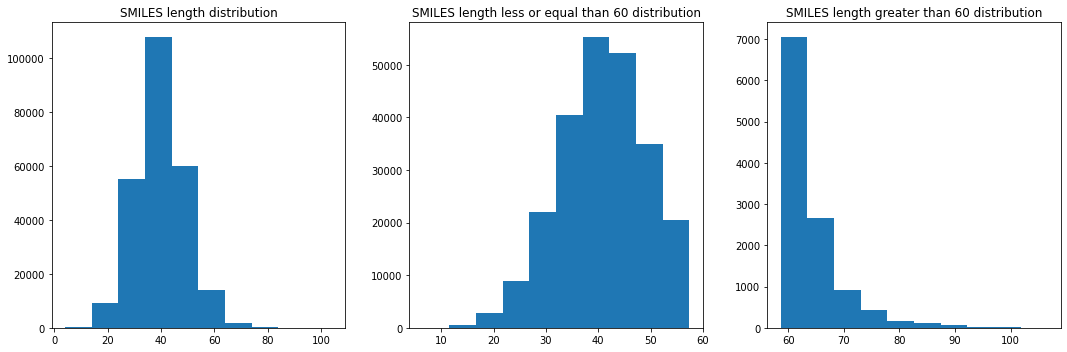

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
axes[0].set_title("SMILES length distribution")
axes[0].hist(dataset_zinc['smiles'].str.len(), align = 'left')
axes[1].set_title("SMILES length less or equal than 60 distribution")
axes[1].hist(dataset_zinc[dataset_zinc['smiles'].str.len() <= 60]['smiles'].str.len(), align = 'left')
axes[2].set_title("SMILES length greater than 60 distribution")
axes[2].hist(dataset_zinc[dataset_zinc['smiles'].str.len() > 60]['smiles'].str.len(), align = 'left')
fig.tight_layout()

if not save:
    plt.show()
else:
    plt.savefig("{0}/lenght_distributions.png".format(IMAGES_PATH))
    plt.clf()

In [ ]:
print("SMILES max length: {0}".format(dataset_zinc['smiles'].str.len().max()))
print("SMILES min length: {0}".format(dataset_zinc['smiles'].str.len().min()))
print("Number of SMILES with length less or equal than 60: {0}".format(len(dataset_zinc[dataset_zinc['smiles'].str.len() <= 60])))
print("Number of SMILES with length grather than 60: {0}".format(len(dataset_zinc[dataset_zinc['smiles'].str.len() > 60])))

SMILES max length: 109
SMILES min length: 9
Number of SMILES with length less or equal than 60: 238026
Number of SMILES with length grather than 60: 11429


From this first part of preprocessing it can be seen that the SMILE with minimum length has length 9 and the one with maximum length has length 109. Furthermore, both from the charts and from the explicit calculation, it can be easily seen that most of the SMILES have a length less than or equal to 60 while the SMILES with a length strictly greater than 60 are very few. Thus having such a great inhomogeneity, through the one-hot-encoding, fixing the length equal to the maximum length in the dataset, relatively large sparse matrices are obtained due to a very low number of SMILE.

The strategy was therefore to consider only SMILES with a length less than or equal to 60.

A second consideration was made to evaluate the reconstruction of the molecules not only on the training set but also on a set of data that no model has learned during the training phase. It was chosen to split: *train set* 70% - *test set* 30%.

In [ ]:
train_set, test_set = train_test_split(dataset_zinc[dataset_zinc['smiles'].str.len() <= 60], test_size = 0.3)
train_set.to_csv(TRAIN_SET_PATH)
test_set.to_csv(TEST_SET_PATH)
print("Number of molecules in train set: {0}".format(len(train_set)))
print("Number of molecules in test set: {0}".format(len(test_set)))

Number of molecules in train set: 166618
Number of molecules in test set: 71408


### **One Hot Encoding**

One-hot encoding is a sparse way of representing data in a binary string in which only a single bit can be 1, while all others are 0. This contrasts from other encoding schemes, like binary and gray code, which allow multiple bits can be 1 or 0, thus allowing for a more dense representation of data.

In Machine Learning, algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. One way to convert this data to numeric form is to use a one-hot encoding. More specifically, a one-hot-encoding is a representation of categorical variables as binary vectors. Each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

![OneHot](https://miro.medium.com/max/700/0*EFxms2sYl--KeUtk)

Compared to standard applications, where one hot encoding encodes a word with a binary vector, in the case of molecular graphs represented as a string, one-hot-encoding consists in encoding each character of the string with a binary vector.

For one-hot-encoding it is necessary to fix or create a dictionary containing all the characters present in the dataset in order to fix a binding between integer and character (or word). 

The image was taken from [here](https://towardsdatascience.com/text-encoding-a-review-7c929514cccf).

The following sources were consulted:

- https://stackabuse.com/one-hot-encoding/
- https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/ 

In this case it was decided to use the following representative character list for the chosen dataset:

In [ ]:
CHARSET = [' ', '#', '(', ')', '+', '-', '/', '1', '2', '3', '4', '5', '6', '7',
        '8', '=', '@', 'B', 'C', 'F', 'H', 'I', 'N', 'O', 'P', 'S', '[', '\\', ']',
        'c', 'l', 'n', 'o', 'r', 's']

In [ ]:
#@title Charset Sanity Check

charset = [' ']
for smile in tqdm(dataset_zinc['smiles'], total = len(dataset_zinc['smiles'])):
    for c in smile:
        if c not in charset:
            charset.append(c)

isbreak = False
for l in CHARSET:
    if l not in charset:
        print(l)
        isbreak = True
        break

if not isbreak:
    print("The vocabulary CHARSET contain all needed characters.")
else:
    print("The vocabulary CHARSET does not contain all needed characters.")



The vocabulary CHARSET contain all needed characters.


The CHARSET list was taken from [this](https://github.com/topazape/molecular-VAE/blob/master/featurizer.py).

The sanity check was then performed by manually reconstructing the CHARSET and comparing them.

The implementation of the encoding and decoding of the SMILE string is in the respective python files used as external libraries where a numpy array containing the one-hot-encoding array or the decoded SMILE string is returned respectively.

I python file containing this operation are:

- *src/<span></span>preprocessing/one_hot_encoding.py*
- *src/<span></span>preprocessing/one_hot_decoding.py*


In [ ]:
smile = "CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1"
hot_enc = enc.OneHotEcodingHandler(charset=CHARSET)
one_hot_encoding = hot_enc.one_hot_encoding(smile)
print(one_hot_encoding)
print("\nOne hot encoding shape: {0}".format(one_hot_encoding.shape))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

One hot encoding shape: (39, 35)


In [ ]:
hot_dec = dec.OneHotDecodingHandler(charset=CHARSET)
decoded_smile = hot_dec.one_hot_decoding(one_hot_encoding)
decoded_smile

'CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1'

In [ ]:
smile == decoded_smile

True

### **SmileDataset & DataLoader**

In Pytorch it is possible to use the DataLoader class that combines the dataset and the sampler together in order to load the dataset either sequentially or in parallel, also taking advantage of the automatic batching support offered. 

It was necessary to implement a custom version of the Pytorch Dataset class, called SmileDataset. In this implementation, each element returned in the iteration is a numpy array containing its one-hot-encoding of a given SMILE string. If any transformations are present, the one-hot-encoding numpy array transformation is returned. For the purposes of the work done, it was useful to be able to apply the transformation from numpy array to tensor of the one-hot encoding.

In [ ]:
BATCH_SIZE = 24

In [ ]:
transformation = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

smile_dataset = smi_data.SmileDataset(TRAIN_SET_PATH, transform=transformation, smile_length = 60)

data_loader = DataLoader(
    smile_dataset,
    batch_size = BATCH_SIZE,
    shuffle = True,
)

x = data_loader.dataset[0]

print("The dimension 0: {0}".format(x.shape[0]))
print("The dimension 1: {0}".format(x.shape[1]))
print("The dimension 2: {0}".format(x.shape[2]))

The dimension 0: 1
The dimension 1: 60
The dimension 2: 35


The implementation of the custom dataset is implemented in an additional python file present in the path:

 - *src/<span></span>preprocessing/smile_dataset.py*





## **Models**

### **Overview**

There are several deep architectures that can be used as generative models:

1. **Recurrent neural networks (RNNs)**: this sequence models are fundamental to molecular generation, infact most VAE and GAN implementations include an RNN for sequence generation. Recurrent neural networks (RNNs) are the most popular models for sequence modeling and generation and there are new efficient variants, called LSTM and GRU, that are tipically used for molecules generation. There are several approaches to generate molecues using RNN such as predict the next character in a input sequence concatenating the predicted token to the input sequence and feeding the new sequence back into the model or using maximum likelihood maximization on the sequence space rather than next-character prediction.

2. **Variational autoencoders (VAEs)**: are derived mathematically from the theory of variational inference and are only called autoencoders because the resulting architecture has the same high level structure as a classical
autoencoder. Again there are different approaches used such as: one hot encoding approach where each SMILE *x* is converted to one hot encoding representation with a convolutional encoder and RNN decoder. Another approach is to represent SMILES in terms of rules from a contextless grammar (CFG). 

3. **Adversarial autoencoders (AAEs)**: are similar to variational autoencoders, but instead of minimizing KL-divergence metric to enforce the generator to output a latent distribution corresponding to a prespecified prior (usually a normal distribution), they use adversarial training with a discriminator $D$ whose job is to distinguish the generator’s latent distribution from the prior.

4. **Supervised VAEs/AAEs for property prediction & optimization**: in supervised VAEs, target properties *y* for each molecule are incorporated into the generator in addition to the SMILES strings or other molecular representation. The strong point is that, in supervised VAE, the generator learns a good latent representation both for property prediction and reconstruction. With the property predictor trained, it becomes possible to do property optimization in the latent space, by either using Gaussian process optimization or gradient ascent.

5. **Generative adversarial networks (GANs)**: in this type of model is introduced, a discriminator network whose job is to distinguish whether the molecule it is looking at was generated by the generative model or came from the training data. In GAN training, the objective of the generative model becomes to try to fool the discriminator rather than maximizing likelihood; however, there are also many technical difficulties which plague GAN training and getting GANs to work well typically requires careful hyperparameter tuning and implementation of several non-obvious “tricks”.



Using the representation of SMILES as strings, three main generative models for the synthesis of molecules with possible variations can be summarized by the following figure:
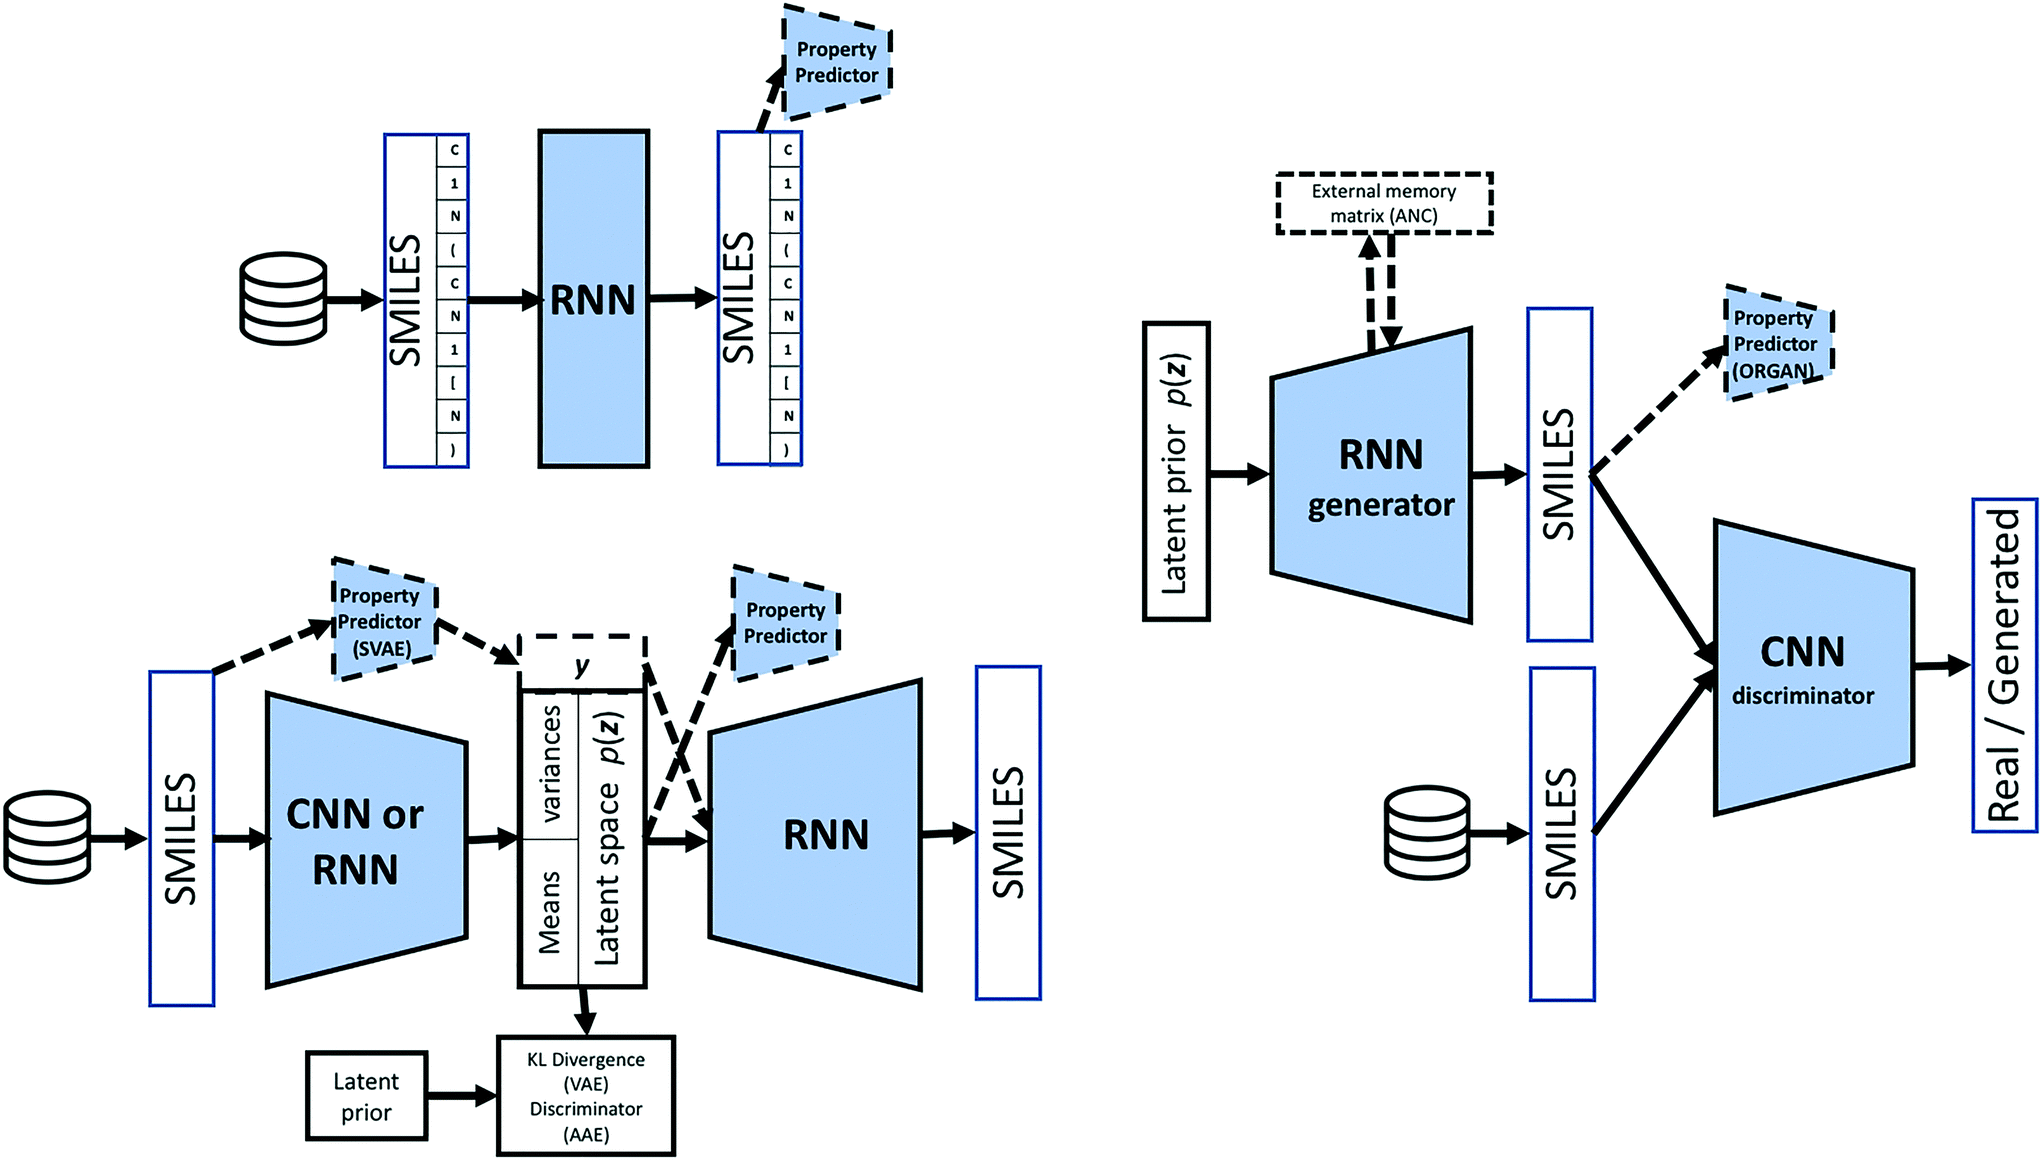


Previous image and previous model informations is taken from [[1]](#1)



### **Models Builded**

For this work, it was decided to implement two different Varational Autoencoders. The generic molecular autoencoder is defined in the additional python file:

- *src/<span></span>models/molecular_vae.py*

via the MolecularVae class. The constructor of this class takes an Encoder and a Decoder as input and, by overriding the forward method, defines the standard high-level behavior of each VAE: encoding, reparametrization and decoding.

Re-parameterization is essential in order to perform backpropagation in the VAE. It basically diverts the non-differentiable operation out of the network, so that, even though we still involve a thing that is non-differentiable, at least it is out of the network, hence the network could still be trained. Two different versions of the reparameterization have been implemented by carrying out training with both reparameterizations. 

The first implementation is:

```
def reparametrization1(mu, logvar):
    if network.training:
        std = (logvar * 0.5).exp()
        return torch.distributions.Normal(loc=mu, scale=std).rsample()
    else:
        return mu
```

The second implementation is:

```
def reparametrization2(mu, logvar):
    if network.training:
        std = torch.exp(0.5 * logvar)
        eps = 1e-2 * torch.randn_like(std)
        w = eps.mul(std).add_(mu)
        return w
    else:
        return mu
```

The reparametrization trick type 1 is taken from [this](https://colab.research.google.com/github/lucmos/DLAI-s2-2020-tutorials/blob/master/08/8_Variational_Autoencoders_(VAEs).ipynb).

The reparametrization trick type 2 is taken from [this](https://github.com/topazape/molecular-VAE/blob/master/models.py).

Two models have been designed and implemented:
- *Convolutional Encoder - Convolutional Decoder*
- *Convolutional Encoder - GRU + Linear Decoder*

#### **Convolutional Encoder - Convolutional Decoder**

This model has been designed to have both convolutional encoder and decoder.

The implementation of the convolutional encoder and the convolutional decoder can be found in the additional python files respectively:

- *src/<span></span>models/encoder/<span></span>convolutional_encoder.py*
- *src/<span></span>models/decoder/<span></span>convolutional_decoder.py*



The activation functions taken into consideration in the design of this model are:

- either ReLU activation function $\sigma(x) = max\{x, 0\}$
- or SeLU activation function $\sigma(x) = \lambda \begin{cases}
                                                    x   &x > 0 \\
                                                    \alpha x^e - \alpha & x\leq 0\\ 
                                                    \end{cases}$

&nbsp;
&nbsp;

The loss function for a variational autoencoder is:

&nbsp;

$$
\ell_{\phi, \theta} = - \mathbb{E}_{q_\phi (z|x)} log\ p_{\theta} (x|z) + KL(q_\phi (z|x) || p_\theta (z)) 
$$

where the KL divergence plays the role of regularizer and the negative log-likehood is the reconstruction loss. The loss function used to calculate the reconstruction error together with the KL divergences is the *cross entropy function*. Using this loss function, it is necessary that the activation function of the last layer of any decoder is neither the ReLU function nor the SeLU function, it is the *sigmoid function*.

The sigmoid activation function is defined as follows: 

$$sig(x) = \frac{1}{1+e^{-x}}$$


##### **Convolutional Encoder**
The architecture of convolutional encoder is defined as:

&nbsp;

<p align = "center">
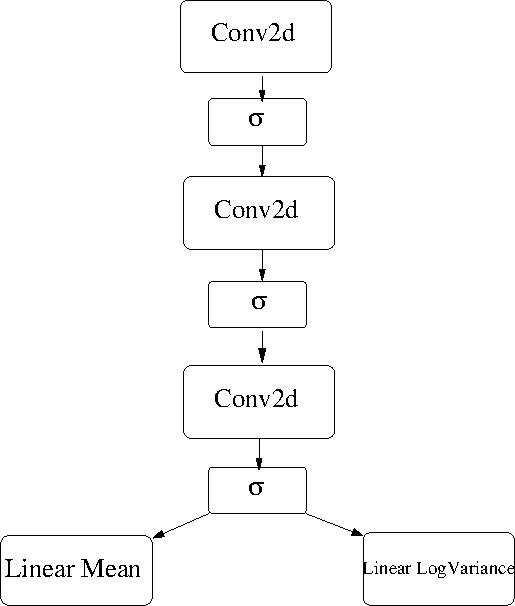

</p>


The convolutional encoder has three convolutional layers, the output of each convolutional layer is followed by the application of the chosen nonlinear activation function. In the different trainings shown, only the ReLU activation function is always used, not using the SeLU function at all since, having carried out preliminary training tests not reported, it was noticed that the SeLu function introduces a lot of noise by increasing the average error during training. The output of the last application of the non-linear function is processed through two different distinct linear applications to calculate the *latent mean* and the *latent log-variance* as usual in VAEs.


&nbsp;
&nbsp;

##### **Convolutional Decoder**

The architecture of convolutional decoder is defined as

<p align = "center">

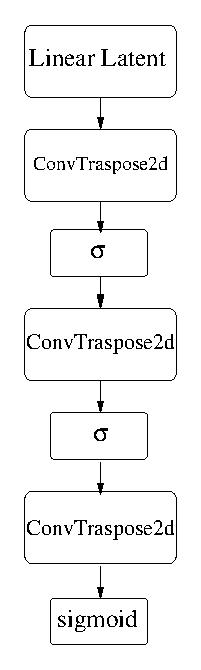
</p>


The convolutional decoder is composed, usually in varational autoencoders, by a first linear layer that performs a linear application on the representation of the latent space of the sample without a subsequent application of a non-linear function. Then there are three convolutional layers, which perform the 2d transposed convolution. The non-linear activation function ReLU is applied to the output of each of the first two layers and the output obtained is input to the next layer. The output of the third layer, being a decoder, is given as input to the sigmoid function as previously mentioned.

The following hypermarameters are fixed in every train of this type of network reported in this notebook (except for the short re-training which includes a smaller number of epochs).

In [ ]:
#Hyperparameters

#Number of epochs for training
NUM_EPOCHS = 35

#Hidden channel dimension
HIDDEN_CHANNEL = 32

#Latent space dimension
LATENT_SPACE_DIM = 196

#Convolutional layer kernel size
KERNEL_SIZE = 3

#Stride is the number of pixels shifts over the input matrix
STRIDE = 1

#Padding size to add around the matrix.
PADDING = 1

Regarding both the decoder and the encoder there are some configurations that are fixed in all the tranining reported in the notebook.

It has been fixed as a hyperparameter that the latent space size is $196$. Furthermore, through unreported preliminary tests it was noted that the smaller the latent space size, the more complicated it is to reach the minimum. That is, to minimize the reconstruction error.

The configurations for the convolutional encoder:

&nbsp;

- convolutional layers:

&nbsp;

| layer|in_channels | out_channels  | kernel size  | stride  | padding |
|---|---|---|---|---|---|
| 1 | 1 | HIDDEN_CHANNELS / 2  | 3  | 1  | 1  |
| 2 | HIDDEN_CHANNELS / 2  | HIDDEN_CHANNELS  | 3 | 1  | 1  |
| 3 | HIDDEN_CHANNELS   | HIDDEN_CHANNELS *2  | 3 | 1  | 1  |

&nbsp;


- linear layers

&nbsp;

| layer|in_features | out_features  |
|---|---|---|
| linear_mu | HIDDEN_CHANNELS * 2 * x.shape[1] * x.shape[2] | LATENT_SPACE_DIM |  
| linear_log-var |  HIDDEN_CHANNELS * 2 * x.shape[1] * x.shape[2]  | LATENT_SPACE_DIM |

&nbsp;

where x.shape[1] is the number of rows of one-hot-encoding matrix and x.shape[2] is the number of columns of one-hot-encoding matrix.

&nbsp;

The configurations for the convolutional decoder layers:

&nbsp;

- convolutional layers: 

&nbsp;

| layer|in_channels | out_channels  | kernel size  | stride  | padding |
|---|---|---|---|---|---|
| 1 | HIDDEN_CHANNELS * 2  | HIDDEN_CHANNELS    | 3  | 1  | 1  |
| 2 | HIDDEN_CHANNELS      | HIDDEN_CHANNELS /2 | 3  | 1  | 1  |
| 3 | HIDDEN_CHANNELS / 2  | 1                  | 3  | 1  | 1  |

&nbsp;

- linear layer:

| layer|in_features | out_features  |
|---|---|---|
| linear_latent | LATENT_SPACE_DIM | HIDDEN_CHANNELS * 2 * x.shape[1] * x.shape[2] |  

&nbsp;

where x.shape[1] is the number of rows of one-hot-encoding matrix and x.shape[2] is the number of columns of one-hot-encoding matrix.

For the training of all models it was decided to fully exploit the potential of colab. So, the training was done on the GPU.

In [ ]:
use_gpu = True
device = torch.device("cuda:0" if use_gpu and torch.cuda.is_available() else "cpu")

##### **Traning 1**

In this first training the above fixed configurations are maintained and the reparametrization trick **implementation type 1** is chosen **without applying any dropout**.

In [ ]:
#Hyperparameters that vary depending on the training

reparametrization = 'type1'
dropout = None

In [ ]:
conv_encoder = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu',
                                                    dropout = dropout) 

conv_decoder = cov_dec.ConvDecoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu')

conv_vae = mod.MolecularVae(conv_encoder, conv_decoder, repar_type = reparametrization)

In [ ]:
optimizer = torch.optim.Adam(params=conv_vae.parameters())

In [ ]:
conv_vae = conv_vae.to(device)
loss_epochs_resume = ut.model_train(conv_vae, data_loader_train, optimizer, NUM_EPOCHS, ut.vae_loss_function, device)

conv_conv_repar1.png

https://colab.research.google.com/drive/1KWx_w_EK5_qjKpujNXPTVpqUWeSewzrb#scrollTo=EQDHU3pQyD5v&line=1&uniqifier=1

Saving the trained model for later use.

In [ ]:
#inference
torch.save(conv_vae.state_dict(), '{0}/conv-conv-mode-riparam1_state-dict.pt'.format(CONV_CONV_MODELS_PATH))

#entire model
torch.save(conv_vae, '{0}/conv-conv-mode-riparam1_model.pt'.format(CONV_CONV_MODELS_PATH))

Saving the average reconstruction loss during the end of each epoch.

In [ ]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])
print(error_time_frame.head())
error_time_frame.to_csv('{0}/conv-conv-model-ripar1_loss.csv'.format(ERROR_DATA_PATH))

   epochs         loss
0       1  2867.199611
1       2  2380.732288
2       3  2268.298064
3       4  2204.718022
4       5  2159.047281


##### **Training 2**

In this first training the above fixed configurations are maintained and the reparametrization trick **implementation type 2** is chosen **with applying dropout to the encoder**. In this case the encoder is given as input nn.Dropout(p = 0.2).

nn.Dropout, during training, randomly zeroes some of the elements of the input tensor with probability *p* using samples from a Bernoulli distribution.

In [ ]:
#Hyperparameters that vary depending on the training

reparametrization = 'type2'
dropout = nn.Dropout2d(p = 0.2)

In [ ]:
conv_encoder2 = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu', 
                                                    dropout = dropout) 

conv_decoder2 = cov_dec.ConvDecoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu')

conv_vae2 = mod.MolecularVae(conv_encoder2, conv_decoder2, repar_type = reparametrization)

In [ ]:
optimizer2 = torch.optim.Adam(params=conv_vae2.parameters())

In [ ]:
conv_vae2 = conv_va2.to(device)
loss_epochs_resume = ut.model_train(conv_vae2, data_loader_train, optimizer2, NUM_EPOCHS, ut.vae_loss_function, device)

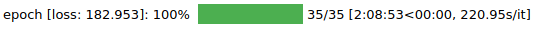

https://colab.research.google.com/drive/1ppxk2wDIpGQR8wrcjKg0v3Thkkg_9XW6#scrollTo=EQDHU3pQyD5v&line=1&uniqifier=1

Saving the trained model for later use.

In [ ]:
#save weights
torch.save(conv_vae2.state_dict(), '{0}/conv-conv-model-dropout-ripar2_state-dict.pt'.format(CONV_CONV_MODELS_PATH))

#save entire model
torch.save(conv_vae2, '{0}/conv-conv-model-dropout-ripar2_entire-model.pt'.format(CONV_CONV_MODELS_PATH))

Saving the average reconstruction loss during the end of each epoch.

In [ ]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])
print(error_time_frame.head())
error_time_frame.to_csv('{0}/conv-conv-model-dropout-ripar2_loss.csv'.format(ERROR_DATA_PATH))

   epochs        loss
0       1  585.785557
1       2  126.377042
2       3   96.460298
3       4   80.454821
4       5   73.412056


Average error analysis along the 35 epochs of both models.

In [ ]:
#@title Average Erorr Analysis
error_loss_repar1 = pd.read_csv('{0}/conv-conv-model-ripar1_loss.csv'.format(ERROR_DATA_PATH))
error_loss_repar2 = pd.read_csv('{0}/conv-conv-model-dropout-ripar2_loss.csv'.format(ERROR_DATA_PATH))

fig = go.Figure()
fig.add_trace(go.Scatter(x = error_loss_repar1['epochs'], y = error_loss_repar1['loss'], mode = 'lines', name = 'conv_conv_repar1'))
fig.add_trace(go.Scatter(x = error_loss_repar2['epochs'], y = error_loss_repar2['loss'], mode = 'lines', name = 'conv_conv_dropout_repar2'))

fig.update_layout(
        title = 'Reconstruction train average error convolutional encoder-decoder VAEs',
        xaxis_title = "Epoch",
        yaxis_title = "Reconstruction errror")

fig.show()

##### **Short re-training**

The reconstruction average error is clearly better minimized in the second setting (**reparametrization implementation type 2** with **dropout**). Analyzing the second setting along the epochs it was seen that near epochs 16-17 and 27-28 the error increases; to overcome this problem, the same configuration was re-trained for only 17 epochs.

In [ ]:
optimal_num_epocs = loss_epochs_resume.index(min(loss_epochs_resume)) + 1
print(optimal_num_epocs)

17


In [ ]:
conv_encoder3 = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu', 
                                                    dropout = nn.Dropout2d(p = 0.2)) 

conv_decoder3 = cov_dec.ConvDecoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu')

conv_vae3 = mod.MolecularVae(conv_encoder3, conv_decoder3, repar_type = 'type2')

In [ ]:
optimizer3 = torch.optim.Adam(params=conv_vae3.parameters())

In [ ]:
conv_vae3 = conv_vae3.to(device)
loss_epochs_resume = ut.model_train(conv_vae3, data_loader_train, optimizer3, optimal_num_epocs, ut.vae_loss_function, device)

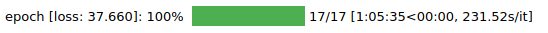

https://colab.research.google.com/drive/1ppxk2wDIpGQR8wrcjKg0v3Thkkg_9XW6#scrollTo=EQDHU3pQyD5v&line=1&uniqifier=1

Saving the trained model for later use.

In [ ]:
#save weights
torch.save(conv_vae3.state_dict(), '{0}/conv-conv-model-dropout-ripar2_state-dict_17epochs.pt'.format(CONV_CONV_MODELS_PATH))

#save entire model
torch.save(conv_vae3, '{0}/conv-conv-model-dropout-ripar2_entire-model_17epochs.pt'.format(CONV_CONV_MODELS_PATH))

Saving the average reconstruction loss during the end of each epoch.

In [ ]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])
print(error_time_frame.head())
error_time_frame.to_csv('{0}/conv-conv-model-dropout-ripar2_loss_17epochs.csv'.format(ERROR_DATA_PATH))

   epochs        loss
0       1  461.035387
1       2   74.358895
2       3   51.587985
3       4   40.927257
4       5   35.743937


In [ ]:
#@title Average Error Analysis

error_loss_repar1_17epochs = pd.read_csv('{0}/conv-conv-model-dropout-ripar2_loss_17epochs.csv'.format(ERROR_DATA_PATH))

fig = go.Figure()
fig.add_trace(go.Scatter(x = error_loss_repar1_17epochs['epochs'], y = error_loss_repar1_17epochs['loss'], mode = 'lines', name = 'conv_conv_repar2'))

fig.update_layout(
        title = 'Reconstruction train average error convolutional encoder-decoder VAE 17 epochs',
        xaxis_title = "Epoch",
        yaxis_title = "Reconstruction errror")

fig.show()

#### **Convolutional Encoder - GRU + Linear Decoder**

This model has been designed to have convolutional encoder and and GRU + Linear decoder.

The activation functions taken into consideration in the design of this model are:

- either ReLU activation function $\sigma(x) = max\{x, 0\}$
- or SeLU activation function $\sigma(x) = \lambda \begin{cases}
                                                    x   &x > 0 \\
                                                    \alpha x^e - \alpha & x\leq 0\\ 
                                                    \end{cases}$

&nbsp;
&nbsp;

The loss function for a variational autoencoder is:

&nbsp;

$$
\ell_{\phi, \theta} = - \mathbb{E}_{q_\phi (z|x)} log\ p_{\theta} (x|z) + KL(q_\phi (z|x) || p_\theta (z)) 
$$

where the KL divergence plays the role of regularizer and the negative log-likehood is the reconstruction loss. The loss function used to calculate the reconstruction error together with the KL divergences is the *cross entropy function*. Using this loss function, it is necessary that the activation function of the last layer of any decoder is neither the ReLU function nor the SeLU function, it is the *sigmoid function*.

&nbsp;
&nbsp;

##### **Convolutional Encoder**

The convolutional encoder is the same as the previous model; therefore it has the same structure. The illustration of the model's architecture is therefore omitted.

&nbsp;
&nbsp;

##### **GRU + Linear Decoder**

The architecture of GRU + Linear decoder is defined as:

<p align = "center">
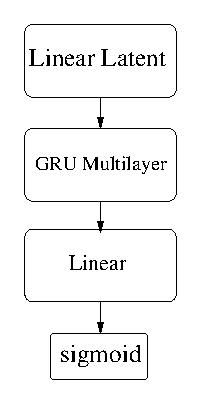

</p>


The GRU + Linear decoder is usually composed, in varational autoencoders, of a first linear layer that performs a linear application on the latent space representation of the sample without subsequent application of a non-linear function. The output of the linear layer is given in input to a multilayer GRU. A non-linear activation function is not applied to the output of the multilayer GRU since the relative non-linear activation functions are applied within the GRU network. The last layer is a linear layer that makes a simple linear map on the output of the GRU network to which the sigmoid activation function is applied which returns the reconstructed data sample. 




In [ ]:
##Hyperparameters unchanged

#Latent space dimension
LATENT_SPACE_DIM = 196

#Number of epochs for training
NUM_EPOCHS = 35



##Encoder hyperparameters

#Hidden channel dimension
HIDDEN_CHANNEL = 32

#Convolutional layer kernel size
KERNEL_SIZE = 3

#Stride is the number of pixels shifts over the input matrix
STRIDE = 1

#Padding size to add around the matrix.
PADDING = 1


## Decoder hyperparameters

#Hidden dimension
HIDDEN_DIM = HIDDEN_CHANNEL * 2

#Linear dimension
LINEAR_DIM = HIDDEN_CHANNEL * 2 * 60

Regarding both the decoder and the encoder there are some configurations that are fixed in all the tranining reported in the notebook.

It has been fixed as a hyperparameter that the latent space size is $196$. Like above, through unreported preliminary tests it was noted that the smaller the latent space size, the more complicated it is to reach the minimum. That is, to minimize the reconstruction error.

The configurations for the convolutional encoder levels are identical to the model typology analyzed above, therefore the configuration table is omitted.

The configurations for the GRU + Linear decoder layers:

&nbsp;

| layer|in_feature/input_size | out_features/hidden_size  | is bidirectional  |
|---|---|---|---|
| Lin | LATENT_SPACE_DIM  | LINEAR_DIM    | None  |
| GRU | HIDDEN_DIM             | x.shape[2] | False |
| Lin | x.shape[1] $\times$  x.shape[2]  | x.shape[1] $\times$ x.shape[2] | None  | 


##### **Training 1**

The first training was carried out, also for this model, using the implementation of the **reparametrization trick type 1** and, for the decoder, using **5 layers** and **no dropout** for the multi-layer GRU network.

In [ ]:
#Hyperparameters that vary depending on the training

#Layers number of GRU multi-layers
NUM_LAYERS = 5

#GRU dropout probability
GRU_DROPOUT = 0

#Reparametrization implementation type
REPARAMETRIZATION = 'type1'

In [ ]:
conv_encoder = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns =x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function='relu', 
                                                    dropout = nn.Dropout2d(p=0.2)) 

gru_decoder = gru_dec.GRULinearDecoder(one_hot_columns = x.shape[1], 
                                       one_hot_rows = x.shape[2], 
                                       hidden_dim = HIDDEN_DIM,
                                       linear_dim = LINEAR_DIM,
                                       latent_dim = LATENT_SPACE_DIM,
                                       num_layers = NUM_LAYERS,
                                       dropout = GRU_DROPOUT,
                                       isBidirectional = False)

conv_gru_vae = mod.MolecularVae(conv_encoder, gru_decoder, repar_type = REPARAMETRIZATION)

In [ ]:
optimizer = torch.optim.Adam(params = conv_gru_vae.parameters())

In [ ]:
conv_gru_vae = conv_gru_vae.to(device)
loss_epochs_resume = ut.model_train(conv_gru_vae, data_loader_train, optimizer, NUM_EPOCHS, ut.vae_loss_function, device)

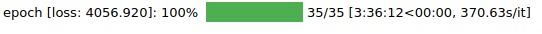

https://colab.research.google.com/drive/10-d1M99XGwdm9n7OOOWgm4aHtLWTH4sa#scrollTo=EQDHU3pQyD5v&line=2&uniqifier=1

Saving the trained model for later use.

In [ ]:
#save weights
torch.save(conv_gru_vae.state_dict(), '{0}/conv-gru-model-5layers-ripar1_state-dict.pt'.format(CONV_GRU_MODELS_PATH))

#save entire model
torch.save(conv_gru_vae, '{0}/conv-gru-model-5layers-ripar1_entire-model.pt'.format(CONV_GRU_MODELS_PATH))

Saving the average reconstruction loss during the end of each epoch.

In [ ]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])
print(error_time_frame.head())
error_time_frame.to_csv('{0}/conv-gru-model-5layers-ripar1_loss.csv'.format(ERROR_DATA_PATH))

   epochs         loss
0       1  4115.996712
1       2  4066.704940
2       3  4063.445527
3       4  4061.892991
4       5  4060.966731


##### **Training 2**

In the second training the implementation of the **reparametrization trick** was changed using the **type 2**, using **2 layers** and **dropout with probability with p = 0.3** for the GRU multi-layers network.

In [ ]:
#Hyperparameters that vary depending on the training

#Layers number of GRU multi-layers
NUM_LAYERS = 2

#GRU dropout probability
GRU_DROPOUT = 0.3

#Reparametrization implementation type
REPARAMETRIZATION = 'type2'

In [ ]:
conv_encoder2 = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu', 
                                                    dropout = nn.Dropout2d(p=0.2)) 

gru_decoder2 = gru_dec.GRULinearDecoder(one_hot_columns = x.shape[1], 
                                       one_hot_rows = x.shape[2], 
                                       hidden_dim = HIDDEN_DIM,
                                       linear_dim = LINEAR_DIM,
                                       latent_dim = LATENT_SPACE_DIM,
                                       num_layers = NUM_LAYERS,
                                       dropout = GRU_DROPOUT,
                                       isBidirectional = False)

conv_gru_vae2 = mod.MolecularVae(conv_encoder2, gru_decoder2, repar_type = REPARAMETRIZATION)

In [ ]:
optimizer2 = torch.optim.Adam(params = conv_gru_vae2.parameters())

In [ ]:
conv_gru_vae2 = conv_gru_vae2.to(device)
loss_epochs_resume = ut.model_train(conv_gru_vae2, data_loader_train, optimizer2, NUM_EPOCHS, ut.vae_loss_function, device)

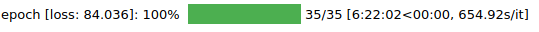

https://colab.research.google.com/drive/10-d1M99XGwdm9n7OOOWgm4aHtLWTH4sa#scrollTo=EQDHU3pQyD5v&line=2&uniqifier=1

Saving the trained model for later use.

In [ ]:
#save weights
torch.save(conv_gru_vae2.state_dict(), '{0}/conv-gru-model-dropout03-2layers-ripar2_state-dict.pt'.format(CONV_GRU_MODELS_PATH))

#save entire model
torch.save(conv_gru_vae2, '{0}/conv-gru-model-dropout03-2layers-ripar2_model.pt'.format(CONV_GRU_MODELS_PATH))

Saving the average reconstruction loss during the end of each epoch.

In [ ]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])
print(error_time_frame.head())
error_time_frame.to_csv('{0}/conv-gru-model-2layers-dropout-ripar2_loss.csv')

   epochs         loss
0       1  2238.708171
1       2   310.160115
2       3   161.879289
3       4   117.513389
4       5    96.494396


##### **Training 3**

In the third training the implementation of the **reparametrization trick** was changed using the **type 2**, using **5 layers** and **no dropout** for the GRU multi-layers network.

In [ ]:
#Hyperparameters that vary depending on the training

#Layers number of GRU multi-layers
NUM_LAYERS = 2

#GRU dropout probability
GRU_DROPOUT = 0

#Reparametrization implementation type
REPARAMETRIZATION = 'type2'

In [ ]:
conv_encoder3 = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function= ' relu', 
                                                    dropout = nn.Dropout2d(p=0.2)) 

gru_decoder3 = gru_dec.GRULinearDecoder(one_hot_columns = x.shape[1], 
                                       one_hot_rows = x.shape[2], 
                                       hidden_dim = HIDDEN_DIM,
                                       linear_dim = LINEAR_DIM,
                                       latent_dim = LATENT_SPACE_DIM,
                                       num_layers = NUM_LAYERS,
                                       dropout = GRU_DROPOUT,
                                       isBidirectional = False)

conv_gru_vae3 = mod.MolecularVae(conv_encoder3, gru_decoder3, repar_type = REPARAMETRIZATION)

In [ ]:
optimizer3 = torch.optim.Adam(params=conv_gru_vae3.parameters())

In [ ]:
conv_gru_vae3 = conv_gru_vae3.to(device)
loss_epochs_resume = ut.model_train(conv_gru_vae3, data_loader_train, optimizer3, NUM_EPOCHS, ut.vae_loss_function, device)

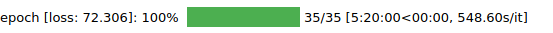

https://colab.research.google.com/drive/1s92bFm0irtUPDdOcM09bCdx2gaiTgcfu#scrollTo=EQDHU3pQyD5v&line=1&uniqifier=1

Saving the trained model for later use.

In [ ]:
#save weights
torch.save(conv_gru_vae3.state_dict(), '{0}/conv-gru-model-5layers-ripar2_state-dict.pt'.format(CONV_GRU_MODELS_PATH))

#save entire model
torch.save(conv_gru_vae3, '{0}/conv-gru-model-5layers-ripar2_entire-model.pt'.format(CONV_GRU_MODELS_PATH))

Saving the average reconstruction loss during the end of each epoch.

In [ ]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])
print(error_time_frame.head())
error_time_frame.to_csv('{0}/conv-gru-model-5layers-ripar2_loss.csv'.format(ERROR_DATA_PATH))

   epochs         loss
0       1  1992.994247
1       2   260.876184
2       3   136.560299
3       4    99.755499
4       5    81.959384


In [ ]:
#@title Average Error Analysis

error_loss_repar0 = pd.read_csv('{0}/conv-gru-model-5layers-ripar1_loss.csv'.format(ERROR_DATA_PATH))
error_loss_repar1 = pd.read_csv('{0}/conv-gru-model-2layers-dropout-ripar2_loss.csv'.format(ERROR_DATA_PATH))
error_loss_repar2 = pd.read_csv('{0}/conv-gru-model-5layers-ripar2_loss.csv'.format(ERROR_DATA_PATH))


fig = go.Figure()
fig.add_trace(go.Scatter(x = error_loss_repar0['epochs'], y = error_loss_repar0['loss'], mode = 'lines', name = 'conv_gru5layers_repar1'))
fig.add_trace(go.Scatter(x = error_loss_repar1['epochs'], y = error_loss_repar1['loss'], mode = 'lines', name = 'conv_gru_2layers_dropout_ripart2'))
fig.add_trace(go.Scatter(x = error_loss_repar2['epochs'], y = error_loss_repar2['loss'], mode = 'lines', name = 'conv_gru_5layer_repar2'))

fig.update_layout(
        title='Reconstruction train average error Convolutional Encoder - GRU + Linear Decoder VAEs',
        xaxis_title="Epoch",
        yaxis_title="Reconstruction errror")

fig.show()

##### **Short re-training**

The trainings **2** and **3**, with the use of the implementation of the **reparametrization trick type2**, presenting a very good minimization of the reconstruction error. As with the other type of model, one of the two models was taken and trained for a smaller number of epochs.

A new instance of the model with 5 layers and no dropout was taken for the GRU multi-layer network and trained for 15 epochs.


In [ ]:
#Hyperparameters that vary depending on the training

#Number of training epochs
NUM_EPOCHS = 15

#Layers number of GRU multi-layers
NUM_LAYERS = 5

#GRU dropout probability
GRU_DROPOUT = 0

#Reparametrization implementatio type
REPARAMETRIZATION = 'type2'

In [ ]:
conv_encoder4 = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu', 
                                                    dropout = nn.Dropout2d(p=0.2)) 

gru_decoder4 = gru_dec.GRULinearDecoder(one_hot_columns = x.shape[1], 
                                       one_hot_rows = x.shape[2], 
                                       hidden_dim = HIDDEN_DIM,
                                       linear_dim = LINEAR_DIM,
                                       latent_dim = LATENT_SPACE_DIM,
                                       num_layers = NUM_LAYERS,
                                       dropout = GRU_DROPOUT,
                                       isBidirectional = False)

conv_gru_vae4 = mod.MolecularVae(conv_encoder4, gru_decoder4, repar_type = REPARAMETRIZATION)

In [ ]:
optimizer4 = torch.optim.Adam(params = conv_gru_vae4.parameters())

In [ ]:
conv_gru_vae4 = conv_gru_vae4.to(device)
loss_epochs_resume = ut.model_train(conv_gru_vae4, data_loader_train, optimizer4, NUM_EPOCHS, ut.vae_loss_function, device)

conv_gru_5layers_repar2_15.png

https://colab.research.google.com/drive/11H6hYQ8OLSZ3H8uAqXK01PwZ8bRP6BDw?authuser=1#scrollTo=EQDHU3pQyD5v&line=2&uniqifier=1

Saving the trained model for later use.

In [ ]:
#save weights
torch.save(conv_gru_vae4.state_dict(), '{0}/conv-gru-model-5layers-ripar2_state-dict_15epochs.pt'.format(CONV_GRU_MODELS_PATH))

#save entire model
torch.save(conv_gru_vae4, '{0}/conv-gru-model-5layers-ripar2_entire-model_15epochs.pt'.format(CONV_GRU_MODELS_PATH))

Saving the average reconstruction loss during the end of each epoch.

In [ ]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])
print(error_time_frame.head())
error_time_frame.to_csv('{0}/conv-gru-model-5layers-ripar2_15epochs-loss.csv'.format(ERROR_DATA_PATH))

   epochs         loss
0       1  1992.994247
1       2   260.876184
2       3   136.560299
3       4    99.755499
4       5    81.959384


In [ ]:
#@title Average Error Analysis

error_loss_repar0 = pd.read_csv('{0}/conv-gru-model-5layers-ripar2_15epochs-loss.csv'.format(ERROR_DATA_PATH))



fig = go.Figure()
fig.add_trace(go.Scatter(x = error_loss_repar0['epochs'], y = error_loss_repar0['loss'], mode = 'lines', name = 'conv_gru5layers_repar2_15epochs'))
fig.update_layout(
        title='Reconstruction train average error Convolutional Encoder - GRU + Linear Decoder VAEs 15 epochs',
        xaxis_title="Epoch",
        yaxis_title="Reconstruction errror")

fig.show()

## **Reconstruction Analysis**

This section analyzes the reconstruction accuracy of the models trained both on the test and on the train set. We will analyze the reconstruction accuracy for the two best pre-trained models: the best VAE Convolutional Encoder - Convolutional Decoder and the best VAE Convolutional Encoder - GRU + Linear Decoder. The reconstruction accuracy will be evaluated both on the *train set* and on the *test set* without carrying out backpropagation, thus keeping the weights unchanged.

In [ ]:
#@title RDKit installation
!wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
!chmod +x Anaconda3-2019.10-Linux-x86_64.sh
!bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-09-14 22:53:55--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alaba

In [ ]:
#@title RDKit dependencies import

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.rdDepictor import Compute2DCoordsMimicDistmat
from rdkit import RDLogger

IPythonConsole.ipython_useSVG=False
RDLogger.DisableLog('rdApp.error')
RDLogger.DisableLog('rdApp.info')  

### **Convolutional Encoder - Convolutional Decoder**

The pre-trained autoencoder model with convolutional encoder and convolutional decoder used to evaluate the molecule reconstruction performance is the one trained for 17 epochs previously described. This model was chosen because, among the trained models of this type, it is the most efficient in terms of minimizing the reconstruction error.

In [ ]:
#Load pretained model
conv_conv_model = torch.load(
    "{0}/conv-conv-model-dropout-ripar2_entire-model_17epochs.pt".format(CONV_CONV_MODELS_PATH), map_location=torch.device('cuda:0')
    )

#### **Train set**

Re-load train set DataLoader with higher batch size and without shuffling.

In [ ]:
transformation = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

train_frame = pd.read_csv(TRAIN_SET_PATH)

smile_train_dataset = smi_data.SmileDataset(TRAIN_SET_PATH, transform=transformation, smile_length=60)

train_data_loader = DataLoader(
    smile_train_dataset,
    batch_size = 1000,
    shuffle = False,
    num_workers=4
)

Reconstruction accuracy evaluation.

In [ ]:
conv_conv_model.eval()

#train_loss_averager = make_averager()

tot_correct_recostructed = 0
smiles_recon = []

with torch.no_grad():
    
    one_hot_dec = dec.OneHotDecodingHandler(charset=CHARSET)
    train_bar = tqdm(train_data_loader, total = len(train_data_loader))
    for smile_batch in train_bar:
        smile_batch = smile_batch.to("cuda:0")
        reconstructed_smile, _, _ = conv_conv_model.forward((smile_batch.float()))
      
        for i in range(len(smile_batch)):
            smile = smile_batch[i].reshape(-1, smile_batch[i].shape[1], smile_batch[i].shape[2])
            original_smile_string = one_hot_dec.one_hot_decoding(smile[0].to("cpu"))
            reconstructed_smile_string = one_hot_dec.one_hot_decoding(reconstructed_smile[i][0].to("cpu"))

            smiles_recon.append(reconstructed_smile_string)

            if (original_smile_string == reconstructed_smile_string):
                tot_correct_recostructed += 1

        ut.refresh_bar(train_bar, desc = "")

    print("Reconstruction accuracy train set: {0}".format(tot_correct_recostructed / len(smile_train_dataset)))

smiles_rec_frame = pd.DataFrame(list(zip(train_frame['smiles'], smiles_recon)), columns=['smiles', 'reconstructed_smiles'])
smiles_rec_frame.to_csv("{0}/conv_conv-reconstruced_train.csv".format(RECON_DATA_PATH))


Reconstruction accuracy train set: 0.9990697283606813


Chemical validity evaluation.

In [ ]:
reconstructed_smile_train = pd.read_csv("{0}/conv_conv-reconstruced_train.csv".format(RECON_DATA_PATH))

valid_reconstructed = 0 
for smile in tqdm(reconstructed_smile_train['reconstructed_smiles'], total = len(reconstructed_smile_train['reconstructed_smiles'])):
    mol = Chem.MolFromSmiles(smile)
    if mol:
         valid_reconstructed += 1

print("Chemical validity ratio of the reconstructed molecules of the train set: {0}".format(valid_reconstructed / len(reconstructed_smile_train['reconstructed_smiles']))) 


Chemical validity ratio of the reconstructed molecules of the train set: 0.9993638142337563


#### **Test set**

Load test set and DataLoader with high batch size and without shuffling.

In [ ]:
transformation = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

test_frame = pd.read_csv(TEST_SET_PATH)
smile_test_dataset = smi_data.SmileDataset(TEST_SET_PATH, transform=transformation, smile_length=60)

test_data_loader = DataLoader(
    smile_test_dataset,
    batch_size = 1000,
    shuffle = False,
    num_workers=4
)

Reconstruction accuracy evaluation.

In [ ]:
conv_conv_model.eval()

test_loss_averager = ut.make_averager()

tot_correct_recostructed = 0
smiles_recon = []

with torch.no_grad():
    
    one_hot_dec = dec.OneHotDecodingHandler(charset=CHARSET)
    test_bar = tqdm(test_data_loader, total=len(test_data_loader), desc = 'batch [loss: ...]')
    for smile_batch in test_bar:
        smile_batch = smile_batch.to("cuda:0")
        reconstructed_smile, latent_mu, latent_logvar = conv_conv_model(smile_batch.float())
        loss = ut.vae_loss_function(reconstructed_smile, smile_batch.float(), latent_mu, latent_logvar)
      
        for i in range(len(smile_batch)):
            smile = smile_batch[i].reshape(-1, smile_batch[i].shape[1], smile_batch[i].shape[2])
            original_smile_string = one_hot_dec.one_hot_decoding_with_padding(smile[0].to("cpu"))
            reconstructed_smile_string = one_hot_dec.one_hot_decoding_with_padding(reconstructed_smile[i][0].to("cpu"))

            smiles_recon.append(reconstructed_smile_string)

            if (original_smile_string == reconstructed_smile_string):
                tot_correct_recostructed += 1

        ut.refresh_bar(test_bar, desc = f"test batch [loss: {test_loss_averager(loss.item()):.3f}]")


    print(f'Average test loss: {test_loss_averager(None)})')
    print("Reconstruction accuracy test set: {0}".format(tot_correct_recostructed / len(smile_test_dataset)))

smiles_rec_frame = pd.DataFrame(list(zip(test_frame['smiles'], smiles_recon)), columns=['smiles', 'reconstructed_smiles'])
smiles_rec_frame.to_csv("{0}/conv_conv-reconstruced_test.csv".format(RECON_DATA_PATH))


Average test loss: 1412.9656397501628)
Reconstruction accuracy test set: 0.9679587721263724


Chemical validity evaluation.


In [ ]:
reconstructed_smile_test = pd.read_csv("{0}/conv_conv-reconstruced_test.csv".format(RECON_DATA_PATH))

valid_reconstructed = 0 
for smile in tqdm(reconstructed_smile_test['reconstructed_smiles'], total = len(reconstructed_smile_test['reconstructed_smiles'])):
    mol = Chem.MolFromSmiles(smile)
    if mol:
         valid_reconstructed += 1

print("Chemical validity ratio of the reconstructed molecules of the test set: {0}".format(valid_reconstructed / len(reconstructed_smile_test['reconstructed_smiles']))) 


Chemical validity ratio of the reconstructed molecules of the test set: 0.9790779744566435


### **Convolutional Encoder - GRU+Linear Decoder**

The pre-trained autoencoder model with convolutional encoder and GRU + Linear decoder used to evaluate the molecule reconstruction performance is the one trained for 15 epochs previously described. This model was chosen because, among the trained models of this type, it is the most efficient in terms of minimizing the reconstruction error.

In [ ]:
#Load pretained model
conv_gru_model = torch.load(
    "{0}/conv-gru-model-5layers-ripar2_entire-model_15epochs.pt".format(CONV_GRU_MODELS_PATH), map_location=torch.device('cpu')
    )

#### **Train set**

Re-load train set DataLoader with higher batch size and without shuffling



In [ ]:
transformation = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

train_frame = pd.read_csv(TRAIN_SET_PATH)

smile_train_dataset = smi_data.SmileDataset(TRAIN_SET_PATH, transform=transformation, smile_length=60)

train_data_loader = DataLoader(
    smile_train_dataset,
    batch_size = 1000,
    shuffle = False,
    num_workers=4
)

Reconstruction accuracy evaluation

In [ ]:
conv_gru_model.eval()

#train_loss_averager = make_averager()

tot_correct_recostructed = 0
smiles_recon = []

with torch.no_grad():
    
    one_hot_dec = dec.OneHotDecodingHandler(charset=CHARSET)
    train_bar = tqdm(train_data_loader, total = len(train_data_loader))
    for smile_batch in train_bar:
        smile_batch = smile_batch.to("cpu")
        reconstructed_smile, _, _ = conv_gru_model(smile_batch.float())

        for i in range(len(smile_batch)):
            smile = smile_batch[i].reshape(-1, smile_batch[i].shape[1], smile_batch[i].shape[2])
            original_smile_string = one_hot_dec.one_hot_decoding_with_padding(smile[0].to("cpu"))
            reconstructed_smile_string = one_hot_dec.one_hot_decoding_with_padding(reconstructed_smile[i][0].to("cpu"))

            smiles_recon.append(reconstructed_smile_string)

            if (original_smile_string == reconstructed_smile_string):
                tot_correct_recostructed += 1

        ut.refresh_bar(train_bar, desc = "")

    print("Reconstruction accuracy train set: {0}".format(tot_correct_recostructed / len(smile_train_dataset)))

smiles_rec_frame = pd.DataFrame(list(zip(train_frame['smiles'], smiles_recon)), columns=['smiles', 'reconstructed_smiles'])
smiles_rec_frame.to_csv("{0}/conv_gru-reconstruced_train.csv".format(RECON_DATA_PATH))


Reconstruction accuracy train set: 0.9972091850820439


Chemical validty evaluation.

In [ ]:
reconstructed_smile_train = pd.read_csv("{0}/conv_gru-reconstructed_train.csv".format(RECON_DATA_PATH))

valid_reconstructed = 0 
for smile in tqdm(reconstructed_smile_train['reconstructed_smiles'], total = len(reconstructed_smile_train['reconstructed_smiles'])):
    mol = Chem.MolFromSmiles(smile)
    if mol:
         valid_reconstructed += 1

print("Chemical validity ratio of the reconstructed molecules of the test set: {0}".format(valid_reconstructed / len(reconstructed_smile_train['reconstructed_smiles']))) 


Chemical validity ratio of the reconstructed molecules of the test set: 0.9978273655907525


#### **Test set**

Load test set and DataLoader with high batch size and without shuffling.

In [ ]:
transformation = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

test_frame = pd.read_csv(TEST_SET_PATH)
smile_test_dataset = smi_data.SmileDataset(TEST_SET_PATH, transform=transformation, smile_length=60)

test_data_loader = DataLoader(
    smile_test_dataset,
    batch_size = 1000,
    shuffle = False,
    num_workers=4
)

Reconstruction accuracy evaluation.

In [ ]:
conv_gru_model.eval()

test_loss_averager = ut.make_averager()

tot_correct_recostructed = 0
smiles_recon = []

with torch.no_grad():
    
    one_hot_dec = dec.OneHotDecodingHandler(charset=CHARSET)
    test_bar = tqdm(test_data_loader, total=len(test_data_loader), desc = 'batch [loss: ...]')
    for smile_batch in test_bar:
        smile_batch = smile_batch.to("cpu")
        #reconstructed_smile, _, _ = conv_gru_model(smile_batch.float())
        reconstructed_smile, latent_mu, latent_logvar = conv_gru_model(smile_batch.float())
        loss = ut.vae_loss_function(reconstructed_smile, smile_batch.float(), latent_mu, latent_logvar)
      
        for i in range(len(smile_batch)):
            smile = smile_batch[i].reshape(-1, smile_batch[i].shape[1], smile_batch[i].shape[2])
            original_smile_string = one_hot_dec.one_hot_decoding_with_padding(smile[0].to("cpu"))
            reconstructed_smile_string = one_hot_dec.one_hot_decoding_with_padding(reconstructed_smile[i][0].to("cpu"))

            smiles_recon.append(reconstructed_smile_string)

            if (original_smile_string == reconstructed_smile_string):
                tot_correct_recostructed += 1

        ut.refresh_bar(test_bar, f"test batch [loss: {test_loss_averager(loss.item()):.3f}]")

    print(f'Average test loss: {test_loss_averager(None)})')
    print("Reconstruction accuracy test set: {0}".format(tot_correct_recostructed / len(smile_test_dataset)))

smiles_rec_frame = pd.DataFrame(list(zip(test_frame['smiles'], smiles_recon)), columns=['smiles', 'reconstructed_smiles'])
smiles_rec_frame.to_csv("{0}/conv_gru-reconstructed_test.csv".format(RECON_DATA_PATH))


Average test loss: 2861.3196953667534)
Reconstruction accuracy test set: 0.936379677347076


Chemical validy evaluation.

In [ ]:
reconstructed_smile_test = pd.read_csv("{0}/conv_gru-reconstructed_test.csv".format(RECON_DATA_PATH))

valid_reconstructed = 0 
for smile in tqdm(reconstructed_smile_test['reconstructed_smiles'], total = len(reconstructed_smile_test['reconstructed_smiles'])):
    mol = Chem.MolFromSmiles(smile)
    if mol:
         valid_reconstructed += 1

print("Chemical validity ratio of the reconstructed molecules of the test set: {0}".format(valid_reconstructed / len(reconstructed_smile_test['reconstructed_smiles']))) 


Chemical validity ratio of the reconstructed molecules of the test set: 0.9979274030920905


## **Molecules Synthesis**

In this section, molecules will be generated by sampling from latent space and evaluating the generated molecules and the properties of the generated molecules. An approach often used in the state of the art is to generate new molecules by perturbing the representation in the latent space of that molecule by sampling in the prior distribution.

In [ ]:
#@title RDKit installation
!wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
!chmod +x Anaconda3-2019.10-Linux-x86_64.sh
!bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2020-09-14 22:44:57--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==

In [ ]:
#@title Import Synthesis & Evaluation Dependencies

import molecules_synthetizer as mol_gen
import metrics as me

In [ ]:
#@title RDKit dependencies import

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
    from rdkit.Chem import Draw
from rdkit.Chem.rdDepictor import Compute2DCoordsMimicDistmat
from rdkit import RDLogger

IPythonConsole.ipython_useSVG=False
RDLogger.DisableLog('rdApp.error')
RDLogger.DisableLog('rdApp.info')  

In [ ]:
#@title Random Reproducibility Stuff

import random
torch.manual_seed(42)
np.random.seed(42)
random.seed(0)

torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True  # Note that this Deterministic mode can have a performance impact
torch.backends.cudnn.benchmark = False

In [ ]:
#@title Utility Function

def print_statistics(valid_synt_ratio : float, 
                     valid_chem_ratio : float,
                     uniqueness_ratio : float,
                     novelty_ratio : float,
                     tanimoto_average : float):
    
    print("The ratio of syntatically valid synthetized molecules: {0}".format(valid_synt_ratio))
    print("The ratio of chemically valid synthetized molecules: {0}".format(valid_chem_ratio))
    print("The ratio of unique chemically valid synthetized molecules: {0}".format(uniqueness_ratio))
    print("The ratio of novelty chemically valid synthetized molecules: {0}".format(novelty_ratio))
    print("The average of Tanimoto Similarity ratio: {0}".format(tanimoto_average))



In many articles in the literature and in many re-implementations there are some fixed molecules used as a starting point from which to perturb and to generate new molecules.

One of these molecules is the *aspirin molecule*:

In [ ]:
aspirine_smile = 'CC(=O)Oc1ccccc1C(=O)O'
print(aspirine_smile)

CC(=O)Oc1ccccc1C(=O)O


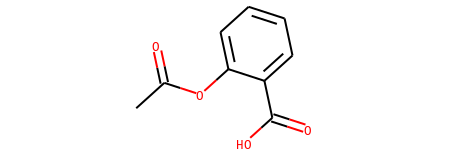

In [ ]:
Chem.MolFromSmiles(aspirine_smile)

Another molecole is the *tamiflu molecule*:

In [ ]:
tamiflu_smile = 'CCOC(=O)C1=CC(OC(CC)CC)C(NC(C)=O)C(N)C1'
print(tamiflu_smile)

CCOC(=O)C1=CC(OC(CC)CC)C(NC(C)=O)C(N)C1


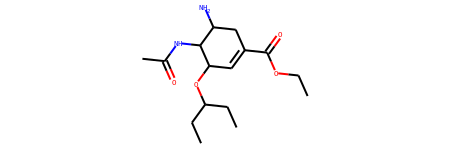

In [ ]:
Chem.MolFromSmiles(tamiflu_smile)

The generation takes place by calculating the latent space point of the starting molecule and using the sampling formula:

$$s = \sigma * \epsilon + \mu$$

where:
-  $\mu$ is the mean obtained from latent representation of a given starting point. 
- $\sigma$ is the standard deviation for sampling. In this work, different values of the standard deviation were manually set to observe the different scores depending on how far you are from the starting point (mean).
- $\epsilon$ ~ $\mathcal{N}(0, 1)$ is the random value sampled from normal distribution.

5000 samples was tested, for different values of the standard deviation. For both types of models, taking the pre-trained models with the best score, 5000 samples were generated starting from the SMILE string representation of the aspirin molecule and the tamiflu molecule. The standard deviation value used are [0.45, 0.65, 0.85]

### **Convolutional Encoder - Convolutional Decoder**



In [ ]:
#Load pretained model
conv_conv_model = torch.load(
    "{0}/conv-conv-model-droput-ripar2_entire-model_17epochs.pt".format(CONV_CONV_MODELS_PATH), map_location=torch.device('cpu')
    )

In [ ]:
one_hot_enc = enc.OneHotEcodingHandler(charset=CHARSET, pad_length=60)
one_hot_dec = dec.OneHotDecodingHandler(charset=CHARSET)

#### **Starting Aspirine Synthesis**



In [ ]:
synthetizer_tamiflu = mol_gen.MoleculesSynthetizer(
    model = conv_conv_model,
    smile_string = aspirine_smile,
    latent_dim = 196,
    one_hot_encoder = one_hot_enc,
    one_hot_decoder = one_hot_dec,
    device = 'cpu'
)

5000 samples with standard deviation $\sigma$ of 0.045.

In [ ]:
std_dev = 0.045
synthetizer_aspirine.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:183: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



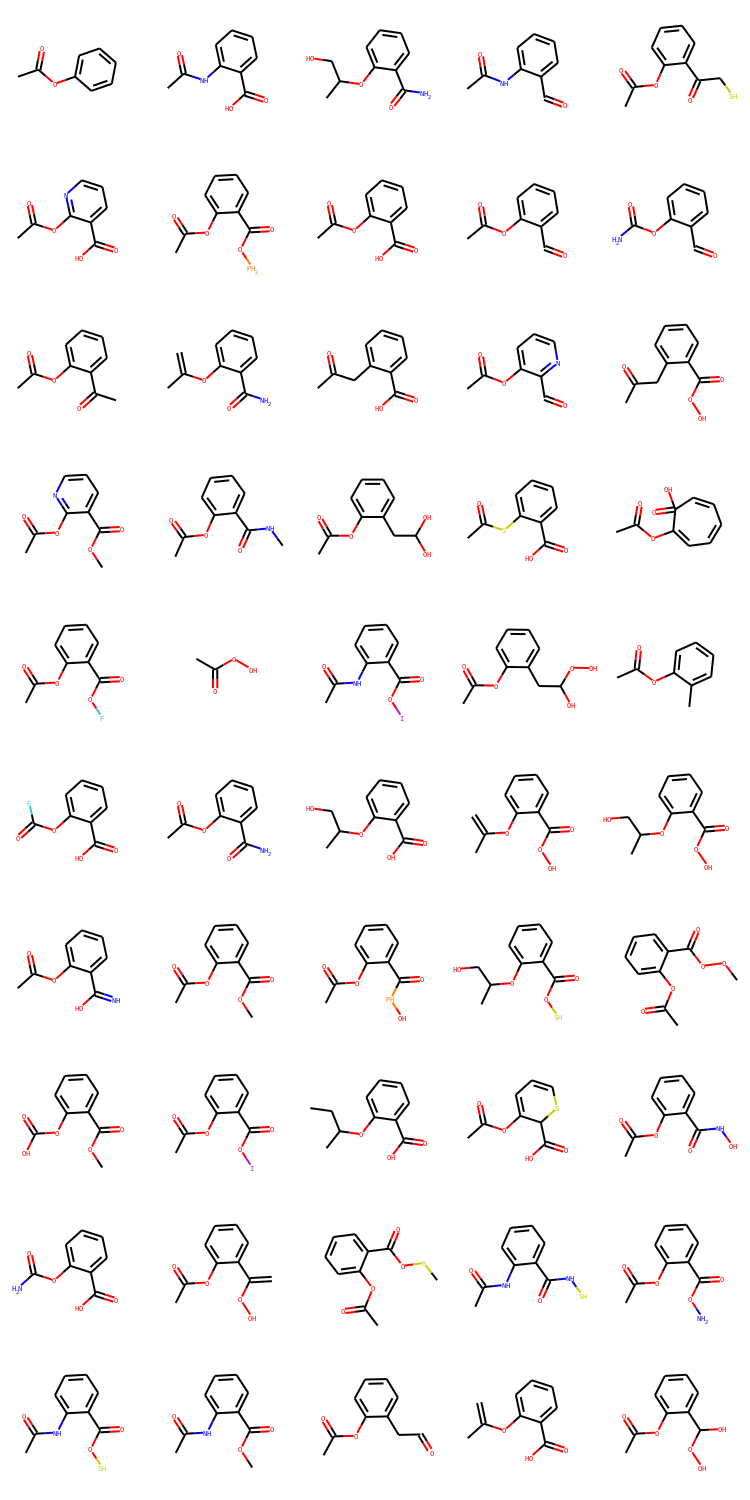

In [ ]:
synthetizer_aspirine.smile_to_csv("{0}/conv-conv_aspirine_045.csv".format(GENERATED_SMILE_PATH))
synthetizer_aspirine.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150, 
    save_path = '{0}/grid_conv-conv_aspirine_045.png'.format(IMAGES_PATH)
)

5000 samples with standard deviation $\sigma$ of 0.065.

In [ ]:
std_dev = 0.065
synthetizer_aspirine.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:183: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



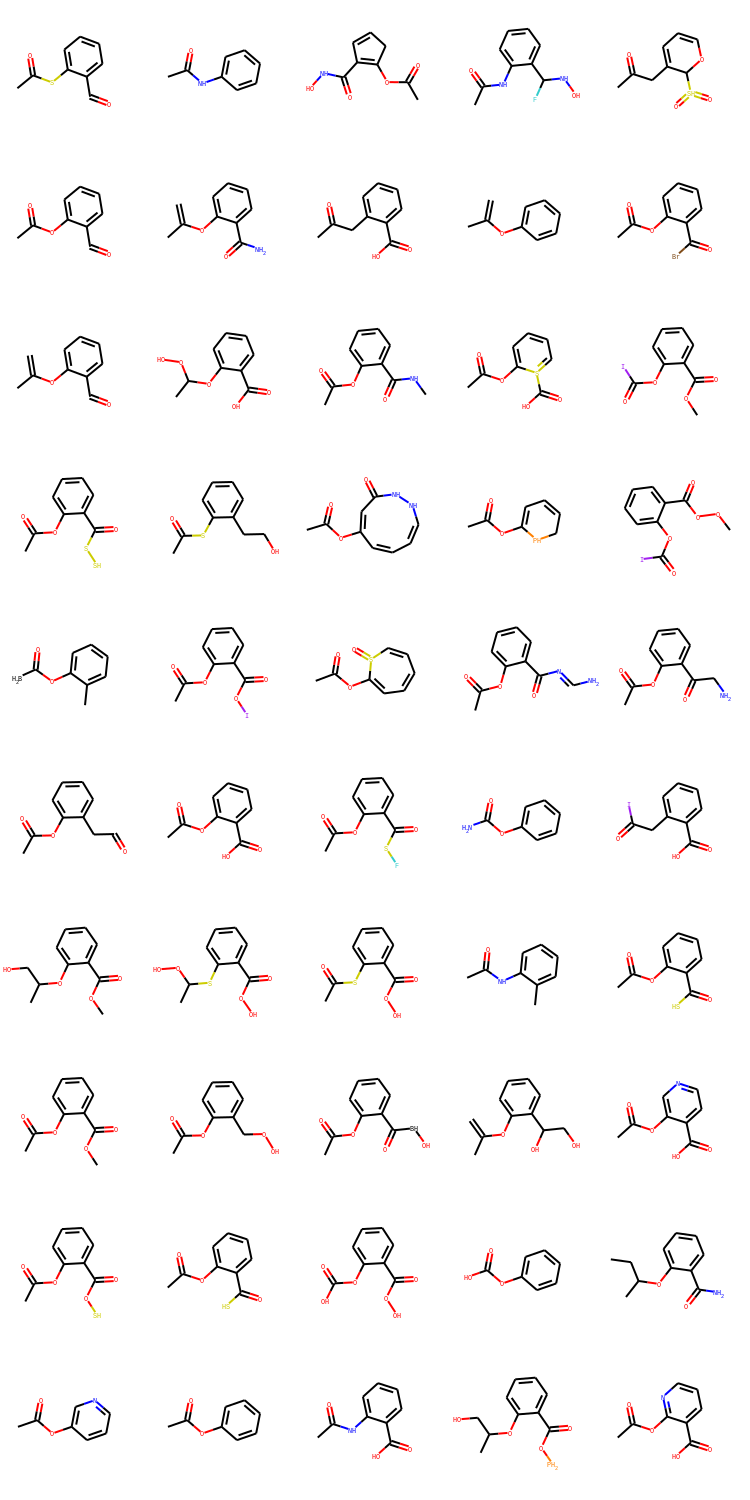

In [ ]:
synthetizer_aspirine.smile_to_csv("{0}/conv-conv_aspirine_065.csv".format(GENERATED_SMILE_PATH))
synthetizer_aspirine.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150, 
    save_path = '{0}/grid_conv-conv_aspirine_065.png'.format(IMAGES_PATH)
)

5000 samples with standard deviation $\sigma$ of 0.085.

In [ ]:
std_dev = 0.085
synthetizer_aspirine.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:183: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



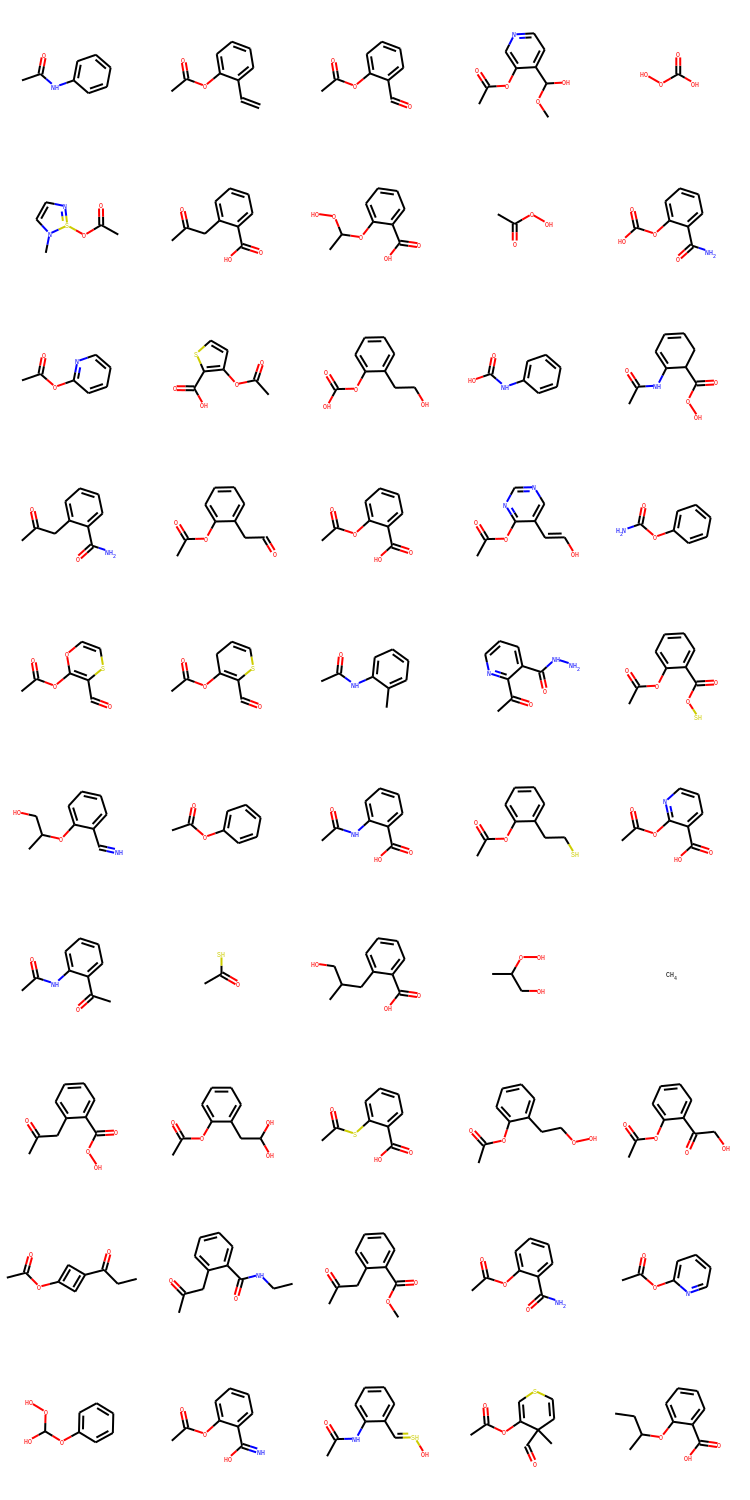

In [ ]:
synthetizer_aspirine.smile_to_csv("{0}/conv-conv_aspirine_085.csv".format(GENERATED_SMILE_PATH))
synthetizer_aspirine.synthetized_molecules_grid(
    start_index = 0,
    end_index = 100,
    mols_per_rows = 5,
    image_size = 150, 
    save_path = '{0}/grid_conv-conv_aspirine_085.png'.format(IMAGES_PATH)
)

#### **Starting Tamiflù Synthesis**


In [ ]:
synthetizer_tamiflu = mol_gen.MoleculesSynthetizer(
    model=conv_conv_model,
    smile_string = tamiflu_smile,
    latent_dim = 196,
    one_hot_encoder = one_hot_enc,
    one_hot_decoder = one_hot_dec,
    device = 'cpu'
)

5000 samples with standard deviation $\sigma$ of 0.045.

In [ ]:
std_dev = 0.045
synthetizer_tamiflu.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:183: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



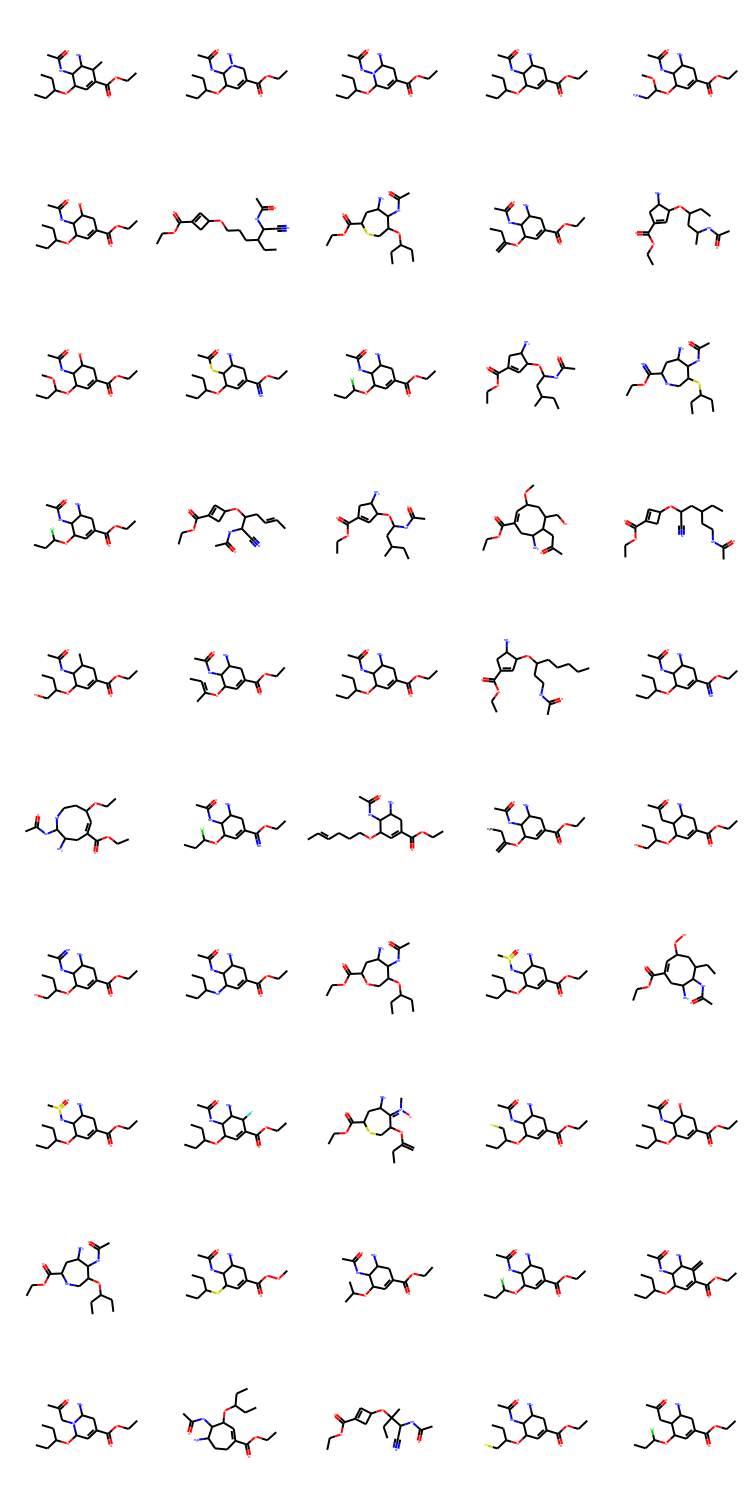

In [ ]:
synthetizer_tamiflu.smile_to_csv("{0}/conv-conv_tamiflu_045.csv".format(GENERATED_SMILE_PATH))
synthetizer_tamiflu.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150, 
    save_path = '{0}/grid_conv-conv_tamiflu_045.png'.format(IMAGES_PATH)
)

5000 samples with standard deviation $\sigma$ of 0.065.

In [ ]:
std_dev = 0.065
synthetizer_tamiflu.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:183: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



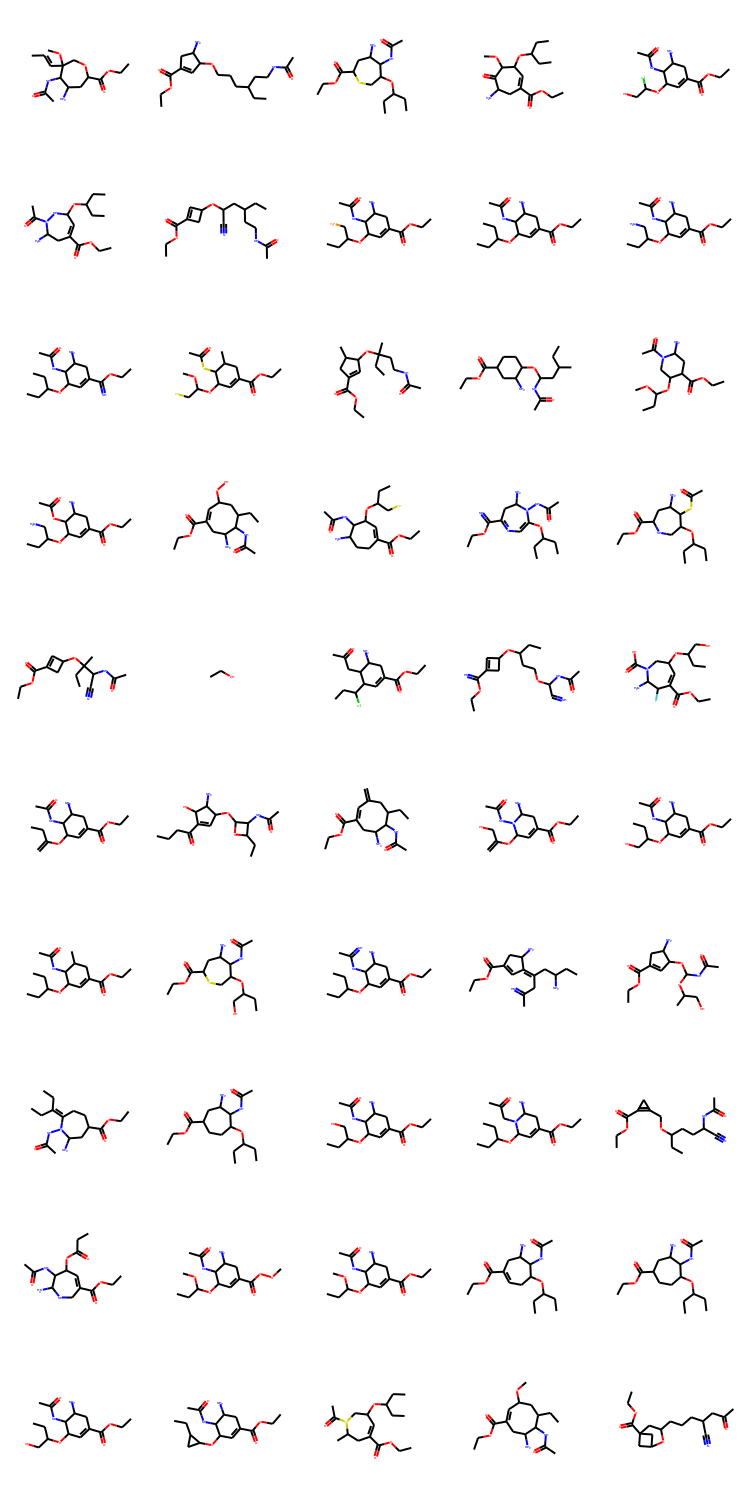

In [ ]:
synthetizer_tamiflu.smile_to_csv("{0}/conv-conv_tamiflu_065.csv".format(GENERATED_SMILE_PATH))
synthetizer_tamiflu.synthetized_molecules_grid(
    start_index = 0,
    end_index = 100,
    mols_per_rows = 5,
    image_size = 150, 
    save_path = '{0}/grid_conv-conv_tamiflu_065.png'.format(IMAGES_PATH)
)

5000 samples with standard deviation $\sigma$ of 0.085.

In [ ]:
std_dev = 0.085
synthetizer_tamiflu.synthetize_syntatically_valid_molecules(std_dev, 5000)

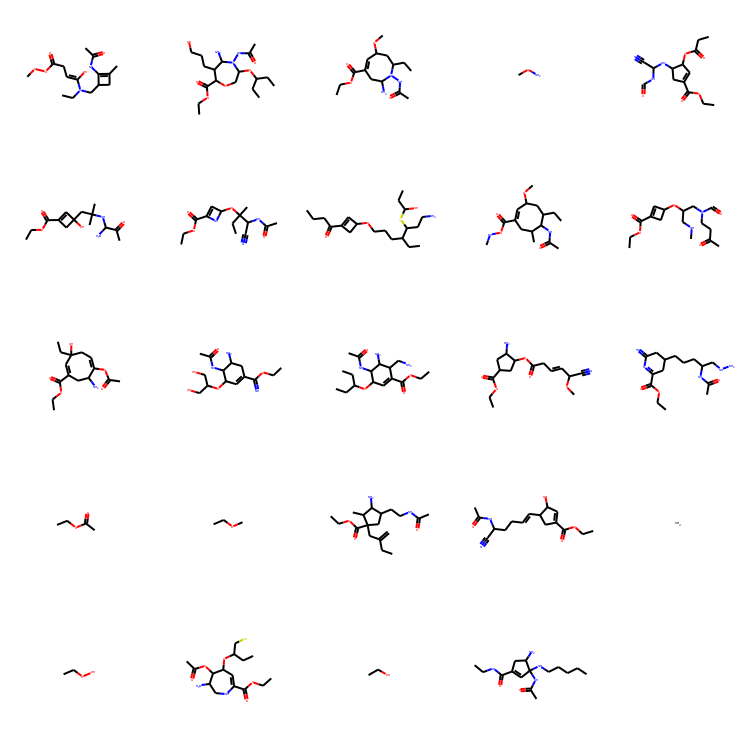

In [ ]:
synthetizer_tamiflu.smile_to_csv("{0}/conv-conv_tamiflu_085.csv".format(GENERATED_SMILE_PATH))
synthetizer_tamiflu.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150, 
    save_path = '{0}/grid_conv-conv_tamiflu_085.png'.format(IMAGES_PATH)
)

#### **Synthesis Evaluation**

In this subsection the scores (*Validity*, *Uniqueness* e *Novelty*) and chemical similarity were evaluated by *Tanimoto Similairty* of the generated molecules.



In [ ]:
conv_conv_aspirine_045 = pd.read_csv("{0}/conv-conv_aspirine_045.csv".format(GENERATED_SMILE_PATH))
conv_conv_aspirine_065 = pd.read_csv("{0}/conv-conv_aspirine_065.csv".format(GENERATED_SMILE_PATH))
conv_conv_aspirine_085 = pd.read_csv("{0}/conv-conv_aspirine_085.csv".format(GENERATED_SMILE_PATH))

conv_conv_tamiflu_045 = pd.read_csv("{0}/conv-conv_tamiflu_045.csv".format(GENERATED_SMILE_PATH))
conv_conv_tamiflu_065 = pd.read_csv("{0}/conv-conv_tamiflu_065.csv".format(GENERATED_SMILE_PATH))
conv_conv_tamiflu_085 = pd.read_csv("{0}/conv-conv_tamiflu_085.csv".format(GENERATED_SMILE_PATH))

train_set = pd.read_csv(TRAIN_SET_PATH)

##### **Starting Aspirine Evaluation**

The following statistics related to using 0.045 as the standard deviation value $\sigma$.

In [ ]:
synthetized_aspirine_045 = conv_conv_aspirine_045['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_aspirine_045)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)


print_statistics(valid_synt_ratio = len(synthetized_aspirine_045) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio,
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.7576
The ratio of chemically valid synthetized molecules: 0.9070749736008448
The ratio of unique chemically valid synthetized molecules: 0.0229918509895227
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.8576971652140912


The following statistics relate to using 0.065 as the standard deviation value $\sigma$.

In [ ]:
synthetized_aspirine_065 = conv_conv_aspirine_065['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_aspirine_065)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)



print_statistics(valid_synt_ratio = len(conv_conv_aspirine_065) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio, 
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.3084
The ratio of chemically valid synthetized molecules: 0.6465629053177692
The ratio of unique chemically valid synthetized molecules: 0.20561685055165496
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.5365280446747698


The following statistics relate to using 0.085 as the standard deviation value $\sigma$.

In [ ]:
synthetized_aspirine_085 = conv_conv_aspirine_085['synthetized_smiles']
chem_valid_smiles, hem_valid_num = me.chemical_validity(synthetized_aspirine_085)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_aspirine_085) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio, 
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.0934
The ratio of chemically valid synthetized molecules: 0.6465629053177692
The ratio of unique chemically valid synthetized molecules: 0.635
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.27243400903515924


##### **Starting Tamiflu Evaluation**

The following statistics related to using 0.045 as the standard deviation value $\sigma$.

In [ ]:
synthetized_tamiflu_045 = conv_conv_tamiflu_045['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_tamiflu_045)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)


print_statistics(valid_synt_ratio = len(synthetized_tamiflu_045) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio, 
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.3434
The ratio of chemically valid synthetized molecules: 0.9452533488642982
The ratio of unique chemically valid synthetized molecules: 0.1250770178681454
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.8253209491023505


The following statistics related to using 0.065 as the standard deviation value $\sigma$.

In [ ]:
synthetized_tamiflu_065 = conv_conv_tamiflu_065['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_tamiflu_065)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)


print_statistics(valid_synt_ratio = len(synthetized_tamiflu_065) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio, 
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.0548
The ratio of chemically valid synthetized molecules: 0.6313868613138686
The ratio of unique chemically valid synthetized molecules: 0.861271676300578
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.4271247490285105


The following statistics related to using 0.085 as the standard deviation value $\sigma$.

In [ ]:
synthetized_tamiflu_085 = conv_conv_tamiflu_085['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_tamiflu_085)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)


print_statistics(valid_synt_ratio = len(synthetized_tamiflu_085) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio, 
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.0144
The ratio of chemically valid synthetized molecules: 0.5277777777777778
The ratio of unique chemically valid synthetized molecules: 0.631578947368421
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.26417587551723054


### **Concolutional Encoder - Gru+Linear Decoder**

In [ ]:
#@title Random Reproducibility Stuff

import random
torch.manual_seed(42)
np.random.seed(42)
random.seed(0)

torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True  # Note that this Deterministic mode can have a performance impact
torch.backends.cudnn.benchmark = False

In [ ]:
#Load pretained model
conv_gru_model = torch.load(
    "{0}/conv-gru-model-5layers-ripar2_entire-model_15epochs.pt".format(CONV_GRU_MODELS_PATH), map_location=torch.device('cpu')
    )

In [ ]:
one_hot_enc = enc.OneHotEcodingHandler(charset = CHARSET, pad_length = 60)
one_hot_dec = dec.OneHotDecodingHandler(charset = CHARSET)

#### **Starting Aspirine Synthesis**

In [ ]:
synthetizer_aspirine = mol_gen.MoleculesSynthetizer(
    model = conv_gru_model,
    smile_string = aspirine_smile,
    latent_dim = 196,
    one_hot_encoder = one_hot_enc,
    one_hot_decoder = one_hot_dec,
    device = 'cpu'
)

5000 samples with standard deviation $\sigma$ of 0.045.

In [ ]:
std_dev = 0.045
synthetizer_aspirine.synthetize_syntatically_valid_molecules(std_dev, 5000)

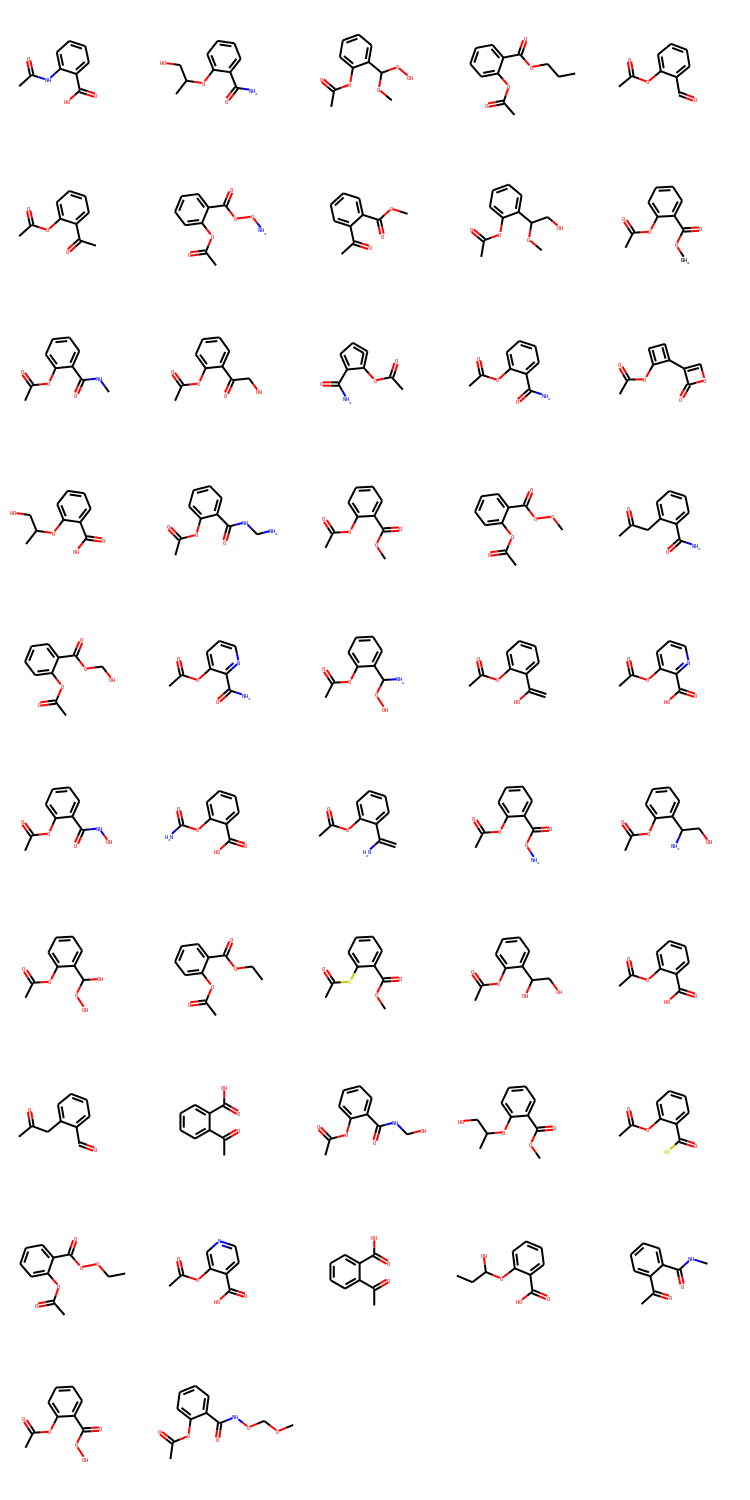

In [ ]:
synthetizer_aspirine.smile_to_csv("{0}/conv-gru_aspirine_045.csv".format(GENERATED_SMILE_PATH))
synthetizer_aspirine.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150, 
    save_path = '{0}/grid_conv-gru_aspirine_045.png'.format(IMAGES_PATH)
)

5000 samples with standard deviation $\sigma$ of 0.065.

In [ ]:
std_dev = 0.065
synthetizer_aspirine.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:183: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



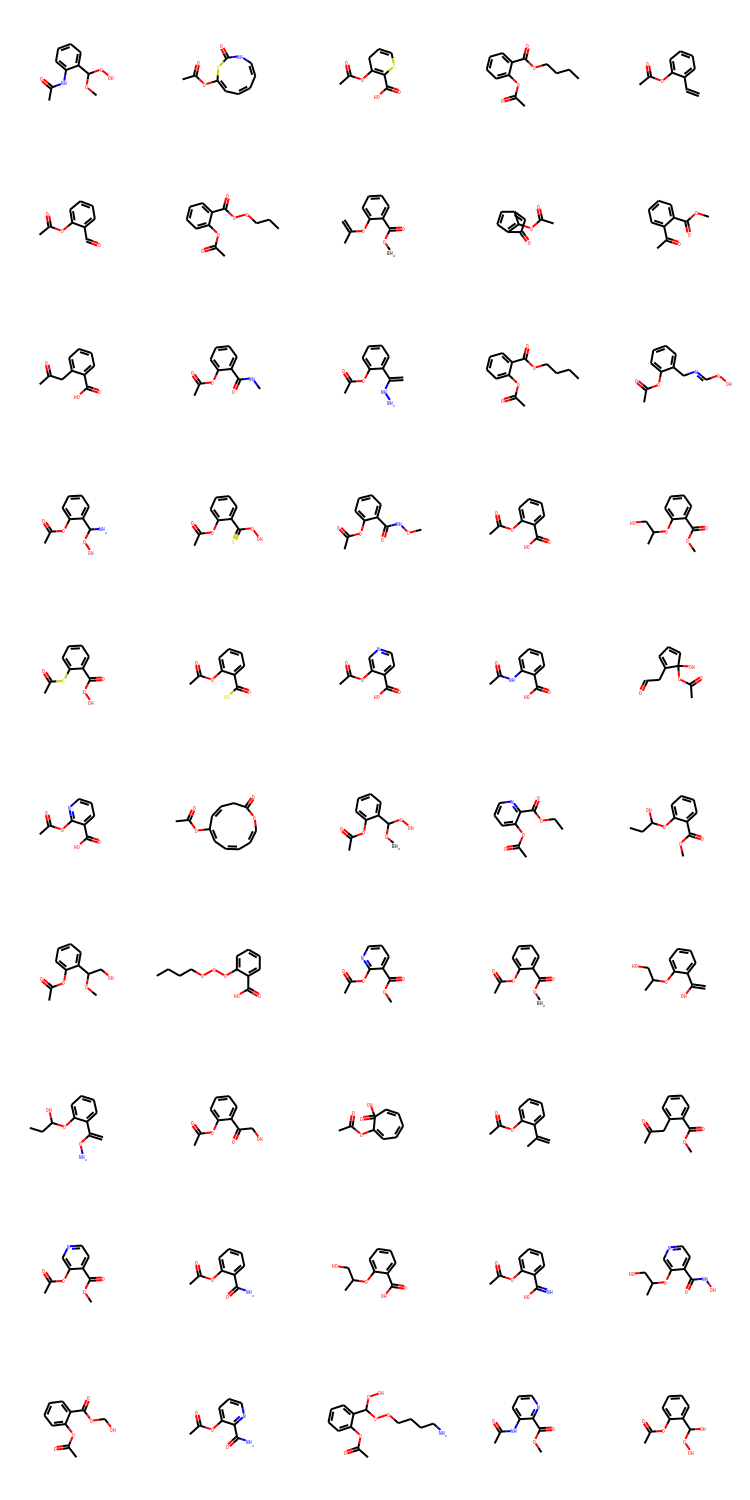

In [ ]:
synthetizer_aspirine.smile_to_csv("{0}/conv-gru_aspirine_065.csv".format(GENERATED_SMILE_PATH))
synthetizer_aspirine.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150, 
    save_path = '{0}/grid_conv-gru_aspirine_065.png'.format(IMAGES_PATH)
)

5000 samples with standard deviation $\sigma$ of 0.085.

In [ ]:
std_dev = 0.085
synthetizer_aspirine.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:183: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



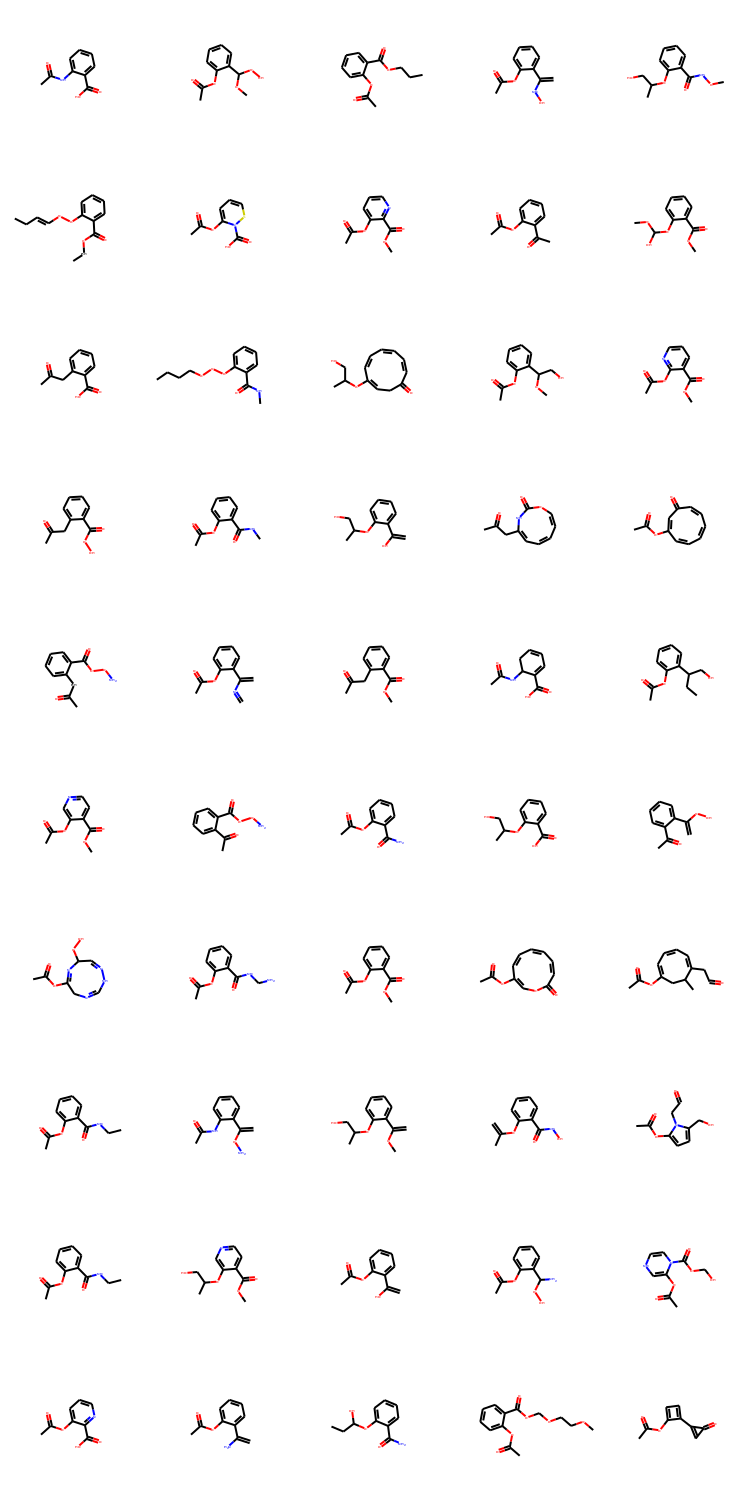

In [ ]:
synthetizer_aspirine.smile_to_csv("{0}/conv-gru_aspirine_085.csv".format(GENERATED_SMILE_PATH))
synthetizer_aspirine.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150, 
    save_path = '{0}/grid_conv-gru_aspirine_085.png'.format(IMAGES_PATH)
)

#### **Starting Tamiflu Synthesis**

In [ ]:
synthetizer_tamiflu = mol_gen.MoleculesSynthetizer(
    model = conv_gru_model,
    smile_string = tamiflu_smile,
    latent_dim = 196,
    one_hot_encoder = one_hot_enc,
    one_hot_decoder = one_hot_dec,
    device = 'cpu'
)

5000 samples with standard deviation $\sigma$ of 0.045.

In [ ]:
std_dev = 0.045
synthetizer_tamiflu.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:183: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



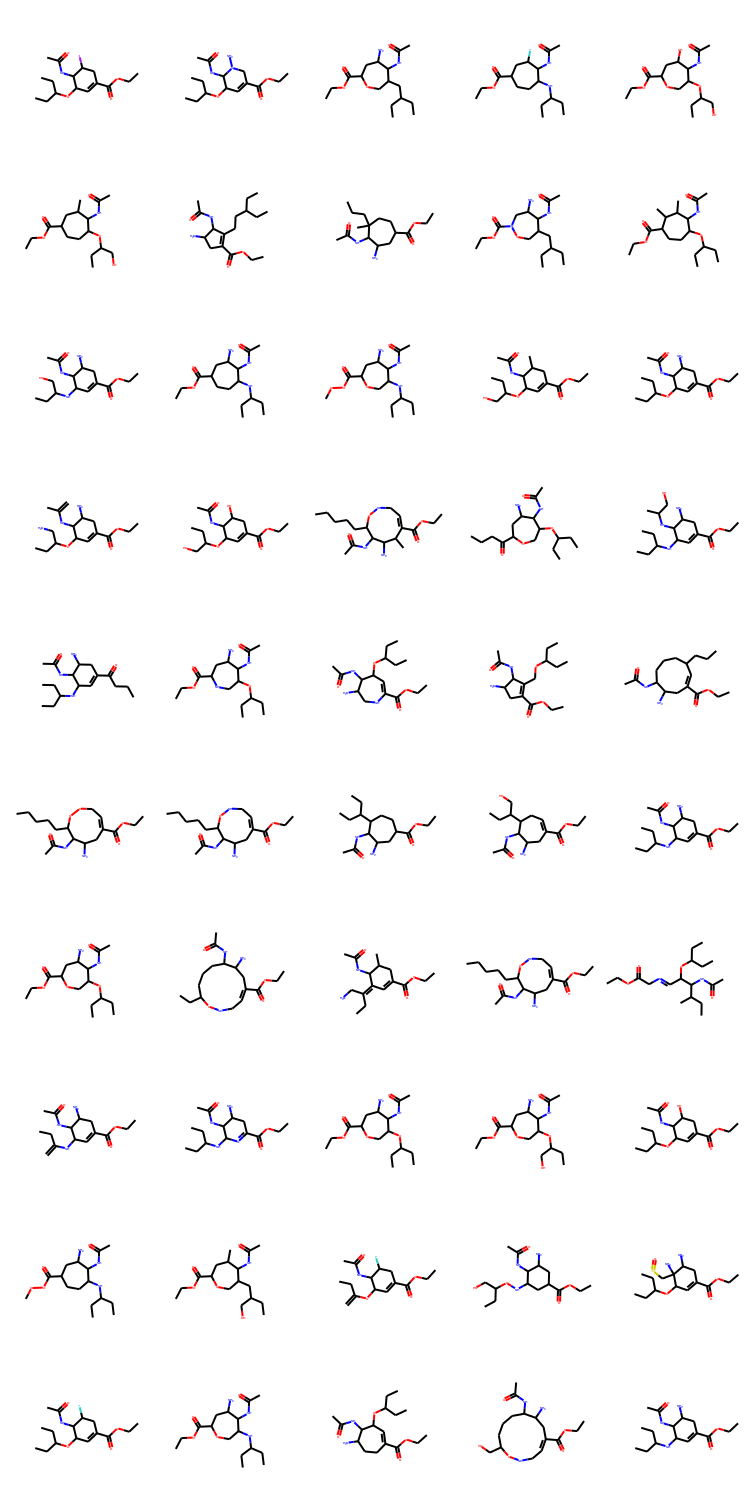

In [ ]:
synthetizer_tamiflu.smile_to_csv("{0}/conv-gru_tamiflu_045.csv".format(GENERATED_SMILE_PATH))
synthetizer_tamiflu.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150, 
    save_path = '{0}/grid_conv-gru_tamiflu_045.png'.format(IMAGES_PATH)
)

5000 samples with standard deviation $\sigma$ of 0.065.

In [ ]:
std_dev = 0.065
synthetizer_tamiflu.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:183: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



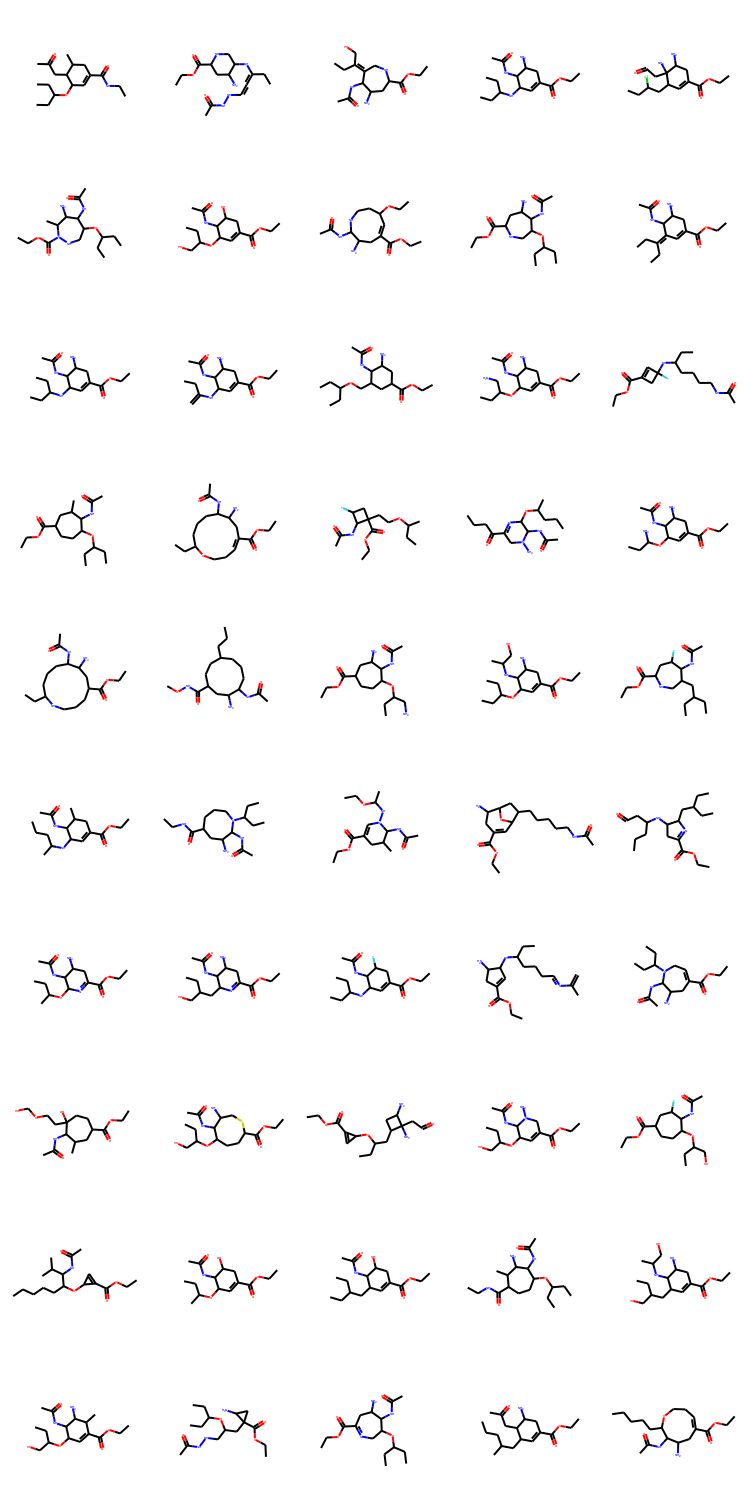

In [ ]:
synthetizer_tamiflu.smile_to_csv("{0}/conv-gru_tamiflu_065.csv".format(GENERATED_SMILE_PATH))
synthetizer_tamiflu.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150, 
    save_path = '{0}/grid_conv-gru_tamiflu_065.png'.format(IMAGES_PATH)
)

5000 samples with standard deviation $\sigma$ of 0.085.

In [ ]:
std_dev = 0.085
synthetizer_tamiflu.synthetize_syntatically_valid_molecules(std_dev, 5000)

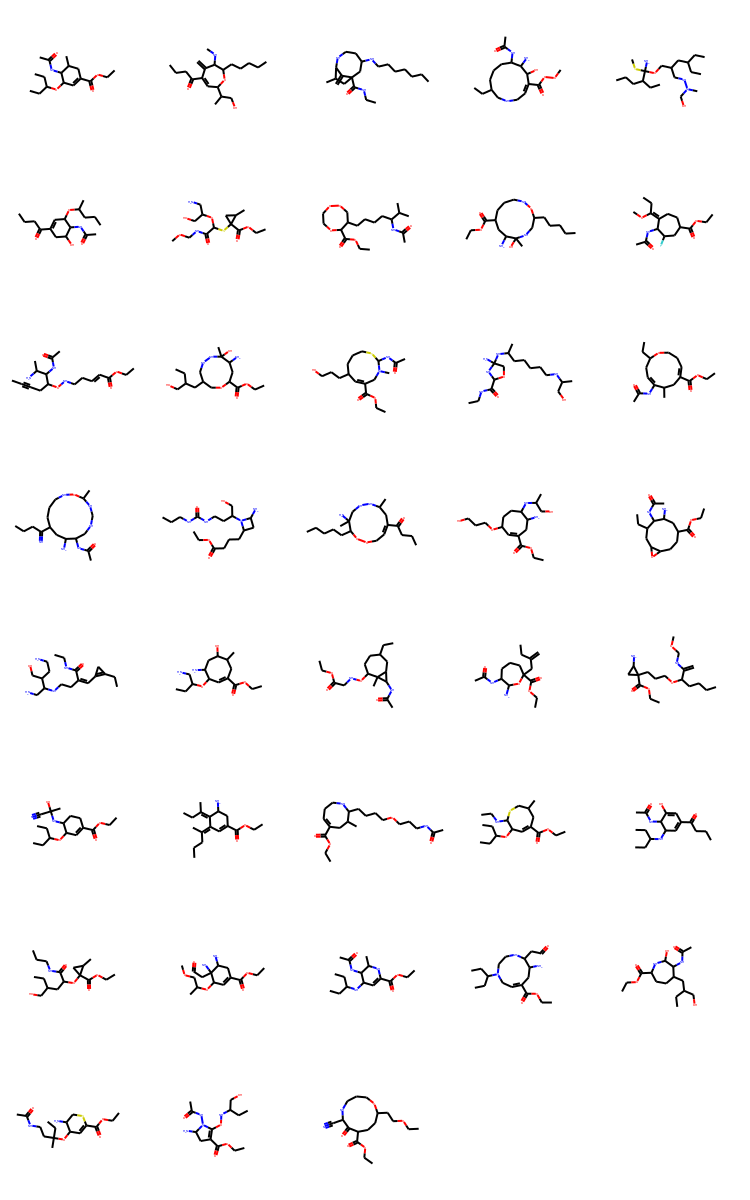

In [ ]:
synthetizer_tamiflu.smile_to_csv("{0}/conv-gru_tamiflu_085.csv".format(GENERATED_SMILE_PATH))
synthetizer_tamiflu.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150, 
    save_path = '{0}/grid_conv-gru_tamiflu_085.png'.format(IMAGES_PATH)
)

#### **Synthesis Evaluation**

In [ ]:
conv_gru_aspirine_045 = pd.read_csv("{0}/conv-gru_aspirine_045.csv".format(GENERATED_SMILE_PATH))
conv_gru_aspirine_065 = pd.read_csv("{0}/conv-gru_aspirine_065.csv".format(GENERATED_SMILE_PATH))
conv_gru_aspirine_085 = pd.read_csv("{0}/conv-gru_aspirine_085.csv".format(GENERATED_SMILE_PATH))

conv_gru_tamiflu_045 = pd.read_csv("{0}/conv-gru_tamiflu_045.csv".format(GENERATED_SMILE_PATH))
conv_gru_tamiflu_065 = pd.read_csv("{0}/conv-gru_tamiflu_065.csv".format(GENERATED_SMILE_PATH))
conv_gru_tamiflu_085 = pd.read_csv("{0}/conv-gru_tamiflu_085.csv".format(GENERATED_SMILE_PATH))

##### **Starting Aspirine Evaluation**

The following statistics related to using 0.045 as the standard deviation value $\sigma$.

In [ ]:
synthetized_aspirine_045 = conv_gru_aspirine_045['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_aspirine_045)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)


print_statistics(valid_synt_ratio = len(synthetized_aspirine_045) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio, 
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.783
The ratio of chemically valid synthetized molecules: 0.9042145593869731
The ratio of unique chemically valid synthetized molecules: 0.01327683615819209
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.8733542016376232


The following statistics related to using 0.065 as the standard deviation value $\sigma$.

In [ ]:
synthetized_aspirine_065 = conv_gru_aspirine_065['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_aspirine_065)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)


print_statistics(valid_synt_ratio = len(synthetized_aspirine_065) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio,
                 novelty_ratio = novelty_ratio, 
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.2992
The ratio of chemically valid synthetized molecules: 0.6102941176470589
The ratio of unique chemically valid synthetized molecules: 0.12814895947426067
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.667356376624394


The following statistics related to using 0.085 as the standard deviation value $\sigma$.

In [ ]:
synthetized_aspirine_085 = conv_gru_aspirine_085['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_aspirine_085)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_aspirine_085) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio,
                 novelty_ratio = novelty_ratio, 
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.0816
The ratio of chemically valid synthetized molecules: 0.34558823529411764
The ratio of unique chemically valid synthetized molecules: 0.6382978723404256
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.38621459167187144


##### **Starting Tamiflu Evaluation**

The following statistics related to using 0.045 as the standard deviation value $\sigma$.

In [ ]:
synthetized_tamiflu_045 = conv_gru_tamiflu_045['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_tamiflu_045)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_tamiflu_045) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio,
                 novelty_ratio = novelty_ratio, 
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.4484
The ratio of chemically valid synthetized molecules: 0.9652096342551294
The ratio of unique chemically valid synthetized molecules: 0.12107208872458411
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.6674007969644452


The following statistics related to using 0.065 as the standard deviation value $\sigma$.

In [ ]:
synthetized_tamiflu_065 = conv_gru_tamiflu_065['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_tamiflu_065)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_tamiflu_065) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio,
                 novelty_ratio = novelty_ratio, 
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.0918
The ratio of chemically valid synthetized molecules: 0.7037037037037037
The ratio of unique chemically valid synthetized molecules: 0.7863777089783281
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.435726420734456


The following statistics related to using 0.085 as the standard deviation value $\sigma$.

In [ ]:
synthetized_tamiflu_085 = conv_gru_tamiflu_085['synthetized_smiles']
chem_valid_smiles, hem_valid_num = me.chemical_validity(synthetized_tamiflu_085)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)


print_statistics(valid_synt_ratio = len(synthetized_tamiflu_085) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio,
                 novelty_ratio = novelty_ratio,  
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.0202
The ratio of chemically valid synthetized molecules: 0.7037037037037037
The ratio of unique chemically valid synthetized molecules: 1.0
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.33593275843486314


## **Conclusions**

Both types of models have been trained with more than one training by changing specific configurations. The best model of any type of autoencoder has a good construction with an excellent minimization of the average reconstruction error.

In fact, the performances of each model in terms of reconstruction accuracy and validity of the reconstructed molecules are as follows:


- For the Convolutional Encoder - Convolutional Decoder

&nbsp;

| Dataset| Recontruction | Validity  
|---|---|---|
| train |  99.91%  | 99.94%  |
| test  |  96.80%  | 97.91%  |


&nbsp;

- For the Convolutional Encoder - GRU + Linear Decoder 

&nbsp;

| Dataset| Recontruction | Validity  
|---|---|---|
| train |  99.72%  | 99.78%  |
| test  |  93.63%  | 99.79%  |

&nbsp;

The Convolutional Encoder - Convolutional Decoder model reconstructs slightly better on the test set. And thus, it shows a better slightly better generalization on unseen examples.

Given $\mathcal{G}$ the set of chemically valid molecules, $\mathcal{D}$ the train set, $n$ the number of syntatically valid generated molecules, $n_{samp}$ the number of sampling done, the following metrics (partially estrapolated from [[1]](#1)) were used to evaluate the generation of molecules:

- *Syntactic Validity Ratio*: $\frac{n}{n_{samp}}$
- *Chemical Validity Ratio*: $\frac{|\mathcal{G}|}{n}$
- *Uniqness*: $\frac{|set(\mathcal{G})|}{n}$
- *Novelty*: $1 - \frac{|\mathcal{G} \cap \mathcal{D}|}{|\mathcal{G}|}$
- *Similarity Ratio*: $\frac{\sum_{i=0}^{|\mathcal{G}|} \sum_{j=i+1}^{|\mathcal{G}|} TanimotoSim(\mathcal{G}_i, \mathcal{G}_j)}{\frac{|\mathcal{G}|(|\mathcal{G}|- 1)}{2}}$

where TanimotoSim is the Tanimoto Similarity defined as:

$$TanimotoSim(A, B) = \frac{A \cdot B}{||A||^2 + ||B||^2 - A \cdot B}$$


&nbsp;

Below are two tables for the synthesis of the Convolutional Decoder - Convolutional Decoder model and two tables for the Convolutional Decoder - GRU + Linear decoder.

&nbsp;

For Convolutional Encoder - Convolutional Decoder:

- Starting the synthesis from *aspirine*:

&nbsp;

| Stdev| SyntValidity | ChemValidity | Uniqness | Novelty | SimRatio|  
|---|---|---|---|---|---|
| 0.045 | 75.76% |  90.71%  | 2.30%   | 100% | 85.77%
| 0.065 | 30.84% |  64.66%  | 20.56%  | 100% | 53.65%
| 0.085 | 9.34%  |  64.66%  | 63.5%   | 100% | 27.24%


&nbsp;

- Starting the synthesis from *tamiflu*:

&nbsp;


| Stdev| SyntValidity | ChemValidity | Uniqness | Novelty | SimRatio|  
|---|---|---|---|---|---|
| 0.045 | 34.34%  |  94.53%  | 12.51% | 100% | 82.53%
| 0.065 |  5.48%  |  63.13%  | 86.13% | 100% | 35.50%
| 0.085 |  1.44%  |  52.78%  | 63.16% | 100% | 26.42%


&nbsp;
&nbsp;

For Convolutional Encoder - GRU + Linear layer Decoder:

- Starting the synthesis from *aspirine*:

&nbsp;

| Stdev| SyntValidity | ChemValidity | Uniqness | Novelty | SimRatio|  
|---|---|---|---|---|---|
| 0.045 | 78.3%   |  90.42%  | 1.33%  | 100%  | 87.34%
| 0.065 | 29.92%  |  61.03%  | 12.84% | 100%  | 66.74%
| 0.085 | 8.16%   |  34.56%  | 63.83%  | 100% | 38.62%


&nbsp;

- Starting the synthesis from *tamiflu*:

&nbsp;


| Stdev| SyntValidity | ChemValidity | Uniqness | Novelty | SimRatio|  
|---|---|---|---|---|---|
| 0.045 | 44.84%  |  96.52%  | 12.10% | 100% | 66.74%
| 0.065 |  9.18%  |  70.37%  | 78.64% | 100% | 45.57%
| 0.085 |  2.02%  |  70.37%  | 100%   | 100% | 35.59%




About *reconstruction*, both models reconstruct very well. The Convolutional Encoder - Convolutional Decoder model reconstructs a slightly better than the other on unseen examples.

Regarding the *molecules synthesis*, we have that by gradually increasing the value of the standard deviation we obtain a number of syntactically valid molecules decreases. Furthermore, by gradually increasing the value of the standard deviation, a smaller number of chemically valid molecules and more dissimilar molecules are obtained. From this it follows that very probably different molecules are obtained, in fact there is an increase in the unique molecules ratio.

Making a direct comparison with the statistics of both models, we have the same trend of statistics in general.

- The Convolutional Encoder - Convolutional encoder model works better 			overall by observing the generation starting from *aspirin*.
- The Convolutional Encoder - GRU + Linear Layer Decoder model works better 		overall by observing the generation starting from *tamiflu*

The interesting observation is that the percentage of valid molecules obtained, the fraction of unique molecules obtained, the fraction of syntactically valid molecules obtained from the 5000 samples, vary according to the value of the standard deviation.

## References

<a id="1">[1]</a>
Elton, Daniel & Boukouvalas, Zois & Fuge, Mark & Chung, Peter. (2019). Deep learning for molecular design - a review of the state of the art. Molecular Systems Design & Engineering. 10.1039/C9ME00039A.